# EDA of Top Games on Google Play Store

- With help of this study, I aimed to to focus on 'android-games' dataset to make Exploratory Data Analysis.

- It is designed to be a beginner-friendly study.

IMPORTANT NOTE : Before starting the EDA study, I would like to point out that since the EDA study was carried out with a working group, it may have similarities with other kernel.

## What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

‘Understanding the dataset’ can refer to a number of things including but not limited to…

- Extracting important variables and leaving behind useless variables
- Identifying outliers, missing values, or human error
- Understanding the relationship(s), or lack of, between variables
- Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the process

By conducting EDA, you can turn an almost useable dataset into a completely useable dataset.

Exploratory Data Analysis does two main things:

- It helps clean up a dataset.
- It gives you a better understanding of the variables and the relationships between them.

There are main components of exploring data:

- Understanding your variables
- Cleaning your dataset
- Analyzing relationships between variables with Data Visualization

## Understanding The Variables

### Let's begin with importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [3]:
#pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [5]:
#!pip install plotly

### It is time to load and read the dataset to get an overview

In [6]:
df = pd.read_csv('android-games.csv')

In [7]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [8]:
df.tail()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False
1729,100,Pinturillo 2,108917,10.0 M,3,1.1,2.5,0.0,GAME WORD,50813,16480,11825,6166,23631,False


In [9]:
df.sample(10)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1210,85,Cookie Run: Kingdom - Kingdom Builder & Battle...,332270,5.0 M,4,8.8,28.9,0.0,GAME ROLE PLAYING,248965,33709,15915,6697,26981,False
444,33,Governor of Poker 3 - Free Texas Holdem Card G...,263341,5.0 M,4,1.0,2.0,0.0,GAME CARD,190221,26703,9851,5793,30771,False
562,37,Big Fish Casino - Play Slots and Casino Games,312113,10.0 M,4,0.0,0.0,0.0,GAME CASINO,238241,41399,13246,4698,14526,False
1008,83,Sudoku,462036,10.0 M,4,172.6,0.5,0.0,GAME PUZZLE,375734,64079,10145,3534,8542,False
308,9,Okey Plus,1245352,10.0 M,4,0.1,0.2,0.0,GAME BOARD,963785,69907,41197,17092,153370,False
16,17,Crossy Road,4464668,100.0 M,4,0.1,0.2,0.0,GAME ACTION,3379550,576816,234463,68644,205194,False
1622,97,Mozkovna,41520,1.0 M,4,0.0,0.0,0.0,GAME TRIVIA,28452,8981,2107,669,1308,False
756,31,Little Panda's Chinese Recipes,129911,50.0 M,4,2.5,5.0,0.0,GAME EDUCATIONAL,98822,8155,5566,3684,13682,False
77,78,Arena of Valor: 5v5 Arena Game,963507,10.0 M,3,0.5,0.9,0.0,GAME ACTION,547583,109014,62331,33309,211267,False
498,79,BlackJack 21 - Online Blackjack multiplayer ca...,113566,5.0 M,4,0.2,0.3,0.0,GAME CARD,83970,12489,4286,2178,10641,False


We usually use df.head(n), df.tail(n) and df.sample(n) to validate that the dataset loaded and looks like how it should be.

In [10]:
# To control the columns in dataframe

df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid'],
      dtype='object')

df.columns returns the label of each column in the DataFrame

***As seen above, there is no standardization in column names. Since we can obtain data from many different sources, we can encounter column names in many different shapes and formats. It will be useful to standardize the column names at the beginning of our work.***

***Column names can be standardized with simple coding. However, there is a great library for standardizing column names, 'skimpy'.***

https://towardsdatascience.com/how-to-clean-messy-pandas-column-names-20dc7400cea7

In [11]:
#!pip install skimpy
from skimpy import clean_columns

In [12]:
columns = ['rank', 
           'title', 
           'total ratings', 
           'installs', 
           'average rating',
           'growth (30 days)', 
           'growth (60 days)', 
           'price', 
           'category',
           '5 star ratings', 
           '4 star ratings', 
           '3 star ratings', 
           '2 star ratings',
           '1 star ratings', 
           'paid']

messy_df = pd.DataFrame(data = [], columns = columns, index = [0])
clean_df = clean_columns(messy_df)
clean_df.columns.tolist()

['rank',
 'title',
 'total_ratings',
 'installs',
 'average_rating',
 'growth_30_days',
 'growth_60_days',
 'price',
 'category',
 '5_star_ratings',
 '4_star_ratings',
 '3_star_ratings',
 '2_star_ratings',
 '1_star_ratings',
 'paid']

In [13]:
df.columns = clean_df.columns.tolist()
df.columns

Index(['rank', 'title', 'total_ratings', 'installs', 'average_rating',
       'growth_30_days', 'growth_60_days', 'price', 'category',
       '5_star_ratings', '4_star_ratings', '3_star_ratings', '2_star_ratings',
       '1_star_ratings', 'paid'],
      dtype='object')

In [14]:
df.shape

(1730, 15)

df.shape returns a tuple containing the shape of the DataFrame.

The shape is the number of rows and columns of the DataFrame

***We have 1730 rows (Games) and 15 columns (Feature)***

### Once I knew all of the variables in the dataset, let's go on getting basic information from dataframe

In [15]:
# To find how many unique values columns have

df.nunique()

rank               100
title             1675
total_ratings     1699
installs             9
average_rating       3
growth_30_days     186
growth_60_days     206
price                6
category            17
5_star_ratings    1697
4_star_ratings    1692
3_star_ratings    1677
2_star_ratings    1653
1_star_ratings    1686
paid                 2
dtype: int64

df.unique() returns the number of unique values for each column

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            1730 non-null   int64  
 1   title           1730 non-null   object 
 2   total_ratings   1730 non-null   int64  
 3   installs        1730 non-null   object 
 4   average_rating  1730 non-null   int64  
 5   growth_30_days  1730 non-null   float64
 6   growth_60_days  1730 non-null   float64
 7   price           1730 non-null   float64
 8   category        1730 non-null   object 
 9   5_star_ratings  1730 non-null   int64  
 10  4_star_ratings  1730 non-null   int64  
 11  3_star_ratings  1730 non-null   int64  
 12  2_star_ratings  1730 non-null   int64  
 13  1_star_ratings  1730 non-null   int64  
 14  paid            1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


df.info() returns information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

***We can easily see from df.info()***

 ***- There 15 columns***
 
 ***- 1730 entries (rows)***
 
 ***- No missing values***
 
 ***- 8 int64, 3 float64, 3 object and 1 bool type column in the dataframe***
 
 ***- There seems to be 11 numeric columns***
 
 ***- We may make some calculations with numeric columns***

In [17]:
# An overview of the values each column contains. 
# Below we can see some basic descriptive statistics for all numeric columns 

df.describe()

,rank,total_ratings,average_rating,growth_30_days,growth_60_days,price,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


The describe() method returns description of the data in the DataFrame

- count : The number of not-empty values.

- mean : The average (mean) value.

- std : The standard deviation.

- min : The minimum value.

- 25% : The 25% percentile (Q1).

- 50% : The 50% percentile (Q2).

- 75% : The 75% percentile (Q3).

- max : The maximum value.

***You can also get the result with df.describe() with a user-defined function as I show below.That is made for a column with numeric value. You can do it for all columns with a 'for' loop.***

In [19]:
def data_describe_num(col):
    print('Count       :', len(df[col]))
    print('Mean        :', np.mean(df[col]))
    print('Std         :', np.std(df[col]))
    print('Min         :', np.min(df[col]))
    print('Q1          :', np.percentile(df[col], 25))
    print('Median(Q2)  :', np.median(df[col]))
    print('Q3          :', np.percentile(df[col], 75))
    print('Max         :', np.max(df[col]))
    
    print('----- ADDITIONAL-----')
    
    print('Mode        :', stats.mode(df[col]))
    print('Range       :', np.max(df[col]) - np.min(df[col]))    
    print('IQR         :', stats.iqr(df[col]))
    print('Num_Outliers:', len(list(i for i in df[col] if i > (np.percentile(df[col], 75) + 1.5 * stats.iqr(df[col])) or \
                              i < (np.percentile(df[col], 25) - 1.5 * stats.iqr(df[col])))))
    print('Outliers    :', list(i for i in df[col] if i > (np.percentile(df[col], 75) + 1.5 * stats.iqr(df[col])) or \
                              i < (np.percentile(df[col], 25) - 1.5 * stats.iqr(df[col]))))

In [20]:
data_describe_num('rank')

Count       : 1730
Mean        : 50.386705202312136
Std         : 28.92837771326258
Min         : 1
Q1          : 25.0
Median(Q2)  : 50.0
Q3          : 75.0
Max         : 100
----- ADDITIONAL-----
Mode        : ModeResult(mode=array([3], dtype=int64), count=array([20]))
Range       : 99
IQR         : 50.0
Num_Outliers: 0
Outliers    : []


In [21]:
# We can also analyze other data types
# But we can not calculate a mean or a standard deviation for the object columns 
# However, it will still display some descriptive statistics

df.describe(include = object)

,title,installs,category
count,1730,1730,1730
unique,1675,9,17
top,Solitaire,10.0 M,GAME CARD
freq,36,805,126


- count : The number of not-empty values.

- unique : The number of unique value.

- top : The value that has the hihgest frequency.

- freq : The frequency of the top values in the column.

***Another version of user defined function for categoric columns.***

In [22]:
def data_describe_obj(col):
    print('Count       :', len(df[col]))
    print('Unique      :', df[col].nunique()) 
    print('Top         :', np.array(df.title.value_counts()[:1].index[0]))
    print('Frequency   :', np.array(df.title.value_counts()[:1].values[0]))
    
        
    print('----- ADDITIONAL-----')
    
    print('Mode        :', stats.mode(df[col]))

In [23]:
data_describe_obj('title')

Count       : 1730
Unique      : 1675
Top         : Solitaire
Frequency   : 36
----- ADDITIONAL-----
Mode        : ModeResult(mode=array(['Solitaire'], dtype=object), count=array([36]))


You can get descriptive statistics values of both categorical and numeric variables together with describe(include='all') code. I prefer to get separately.

In [24]:
df.describe(include = 'all')

,rank,title,total_ratings,installs,average_rating,growth_30_days,growth_60_days,price,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,paid
count,1730.000000,1730,1.730000e+03,1730,1730.000000,1730.000000,1730.000000,1730.000000,1730,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1730
unique,NaN,1675,NaN,9,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Solitaire,NaN,10.0 M,NaN,NaN,NaN,NaN,GAME CARD,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,36,NaN,805,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,NaN,NaN,1723
mean,50.386705,NaN,1.064332e+06,NaN,3.908092,321.735896,122.554971,0.010942,NaN,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05,NaN
std,28.936742,NaN,3.429250e+06,NaN,0.290973,6018.914507,2253.891703,0.214987,NaN,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05,NaN
min,1.000000,NaN,3.299300e+04,NaN,2.000000,0.000000,0.000000,0.000000,NaN,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02,NaN
25%,25.000000,NaN,1.759992e+05,NaN,4.000000,0.100000,0.200000,0.000000,NaN,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04,NaN
50%,50.000000,NaN,4.286065e+05,NaN,4.000000,0.500000,1.000000,0.000000,NaN,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04,NaN
75%,75.000000,NaN,8.837970e+05,NaN,4.000000,1.700000,3.300000,0.000000,NaN,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04,NaN


In [25]:
# To check the missing values

df.isnull().sum()

rank              0
title             0
total_ratings     0
installs          0
average_rating    0
growth_30_days    0
growth_60_days    0
price             0
category          0
5_star_ratings    0
4_star_ratings    0
3_star_ratings    0
2_star_ratings    0
1_star_ratings    0
paid              0
dtype: int64

In [26]:
# Let's get the percentage of missing values

df.isnull().sum() / df.shape[0] * 100

rank              0.0
title             0.0
total_ratings     0.0
installs          0.0
average_rating    0.0
growth_30_days    0.0
growth_60_days    0.0
price             0.0
category          0.0
5_star_ratings    0.0
4_star_ratings    0.0
3_star_ratings    0.0
2_star_ratings    0.0
1_star_ratings    0.0
paid              0.0
dtype: float64

***- There seems to be no missing value.-***

In [27]:
df.duplicated().value_counts()

False    1730
dtype: int64

***- There seems to be no duplicated value.***

***According to the basic examinations on the dataset;***

 ***-This is a dataset of top 100 games of each category of games on Google Play Store along with their ratings and other data like price and number of installs***
 
 ***- We have 1730 rows (Games) and 15 columns (Feature)***
 
 ***- There seems to be no missing value***
 
 ***- There seems to be no duplicated value***
 
 ***- 11 columns contain numerical values, 3 columns contain categorical value and 1 column contains boolean type value***
 
 ***- 'installs' columns dtype is object. But, it contains numeric values. We are goint to deal with this column***
 
 ***-'star_ratings columns values are huge and don't make any sense as such. It makes more sense to see the percentages.***
 
 ***- 'paid' and 'price' columns seem to have similar contents. We are going to look in detail and if necessary drop one of them***

## Cleaning The Dataset

Data cleaning is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing data by correcting or deleting them.

Cleaning up data is the first and most important step, as it ensures the quality of the data is met to prepare data for visualization.

The steps in cleaning the data as;

- Checking Null entries
- Removing Null Entries
- Filling values in place of Null Entries(If Numerical feature)
- Checking Duplicates
- Removing Duplicates

Once the data we are dealing now is clean ( There is no missing value and duplicate value), we can go further.

## Necessary Adjustments Before Analysis

- Till now, we got an overview to dataset to fix any issues before moving on to a more sophisticated analysis. 

Before going further, let's make a copy of dataframe. I feel more relax by making this copy. Before making changings and adjustments on the dataset, I prefer to make a copy and work on it.

In [28]:
df_1 = df.copy()

In [29]:
df_1.head(1)

,rank,title,total_ratings,installs,average_rating,growth_30_days,growth_60_days,price,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False


**Let's go on further with 'install' column**

 ***- 'installs' column displays numeric values. However, it's type is 'object'. We have to fix it.***

In [30]:
df_1.installs.value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

***- Via 'in_thousand' function we will change the values into million***

In [31]:

# df["installs"]=df["installs"].str.replace(".0 M","000000").str.replace(".0 k","000").astype('int32')
# df_1 = df_1.rename(columns = {'installs': 'installs_in_million'})

In [32]:
def in_thousand (inst) :
    if inst == '500.0 k' :
        return '0.5 M'
    elif inst == '100.0 k' :
        return '0.1 M'
    else :
        return inst

In [33]:
df_1['installs'] = df_1['installs'].apply(in_thousand)

In [34]:
df_1['installs']

0       500.0 M
1       500.0 M
2       100.0 M
3       100.0 M
4       500.0 M
         ...   
1725      1.0 M
1726      1.0 M
1727     10.0 M
1728      5.0 M
1729     10.0 M
Name: installs, Length: 1730, dtype: object

***- Now, all the values in 'install' column in million form and we got rid of 'k'***

***- Let's get rid of 'M' and make a numerical variable.***

In [35]:
df_1['installs'] = df_1['installs'].str.replace( 'M', '').str.strip().astype('float')

In [36]:
df_1['installs']

0       500.0
1       500.0
2       100.0
3       100.0
4       500.0
        ...  
1725      1.0
1726      1.0
1727     10.0
1728      5.0
1729     10.0
Name: installs, Length: 1730, dtype: float64

***- With this step, we got rid of 'M' and changed type as 'float64'.***

***- By renaming the column we summarized what we had done before.*** 

In [37]:
df_1 = df_1.rename(columns = {'installs': 'installs_in_million'})

In [38]:
df_1['installs_in_million'].value_counts().sort_index()

0.1         3
0.5        15
1.0       192
5.0       245
10.0      805
50.0      252
100.0     204
500.0      12
1000.0      2
Name: installs_in_million, dtype: int64

**Next are the 'star_ratings' columns**

 ***- 'star_ratings' is very effective in understanding how the game is rated by the user. However, the numbers are huge and don't make any sense as such. Let's see what we can do.***

In [39]:
df_1.head(1)

,rank,title,total_ratings,installs_in_million,average_rating,growth_30_days,growth_60_days,price,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False


In [40]:
df_1['5_star_percent'] = round(df_1['5_star_ratings']  / (df_1['5_star_ratings'] + df_1['4_star_ratings'] + df_1['3_star_ratings'] + df_1['2_star_ratings'] + df_1['1_star_ratings']) * 100, 2)
df_1['4_star_percent'] = round(df_1['4_star_ratings']  / (df_1['5_star_ratings'] + df_1['4_star_ratings'] + df_1['3_star_ratings'] + df_1['2_star_ratings'] + df_1['1_star_ratings']) * 100, 2)
df_1['3_star_percent'] = round(df_1['3_star_ratings']  / (df_1['5_star_ratings'] + df_1['4_star_ratings'] + df_1['3_star_ratings'] + df_1['2_star_ratings'] + df_1['1_star_ratings']) * 100, 2)
df_1['2_star_percent'] = round(df_1['2_star_ratings']  / (df_1['5_star_ratings'] + df_1['4_star_ratings'] + df_1['3_star_ratings'] + df_1['2_star_ratings'] + df_1['1_star_ratings']) * 100, 2)
df_1['1_star_percent'] = round(df_1['1_star_ratings']  / (df_1['5_star_ratings'] + df_1['4_star_ratings'] + df_1['3_star_ratings'] + df_1['2_star_ratings'] + df_1['1_star_ratings']) * 100, 2)

In [41]:
df_1.head(1)

,rank,title,total_ratings,installs_in_million,average_rating,growth_30_days,growth_60_days,price,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,paid,5_star_percent,4_star_percent,3_star_percent,2_star_percent,1_star_percent
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False,73.66,5.74,3.66,2.46,14.48


In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total_ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average_rating       1730 non-null   int64  
 5   growth_30_days       1730 non-null   float64
 6   growth_60_days       1730 non-null   float64
 7   price                1730 non-null   float64
 8   category             1730 non-null   object 
 9   5_star_ratings       1730 non-null   int64  
 10  4_star_ratings       1730 non-null   int64  
 11  3_star_ratings       1730 non-null   int64  
 12  2_star_ratings       1730 non-null   int64  
 13  1_star_ratings       1730 non-null   int64  
 14  paid                 1730 non-null   bool   
 15  5_star_percent       1730 non-null   f

In [43]:
last_column = df_1.pop('paid')
df_1.insert(19, 'paid', last_column)
df_1.head(1)

,rank,title,total_ratings,installs_in_million,average_rating,growth_30_days,growth_60_days,price,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,5_star_percent,4_star_percent,3_star_percent,2_star_percent,1_star_percent,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,73.66,5.74,3.66,2.46,14.48,False


**Next are the 'paid' and 'price' columns**

 ***- 'paid' and 'price' columns are seemed to be common. If we have look at the values of these columns we can easily observe that almost all the games are free. We can drop one of them.***

In [44]:
df_1['price'].value_counts()

0.00    1723
1.99       3
7.49       1
2.99       1
1.49       1
0.99       1
Name: price, dtype: int64

In [45]:
df_1['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [46]:
df_1['paid'].value_counts(normalize = True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

***- Almost all games are free. Only 7 games are paid***

***- Whether the games are paid or not does not seem to be a distinguishing feature for EDA, as it can be seen***

***- I'm dropping the 'price' column as I think only the 'paid' column will be enough for further analysis***

In [47]:
df_1.drop('price', axis = 1, inplace = True)

In [48]:
df_1.shape

(1730, 19)

In [49]:
df_1.head(1)

,rank,title,total_ratings,installs_in_million,average_rating,growth_30_days,growth_60_days,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,5_star_percent,4_star_percent,3_star_percent,2_star_percent,1_star_percent,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,73.66,5.74,3.66,2.46,14.48,False


In [50]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total_ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average_rating       1730 non-null   int64  
 5   growth_30_days       1730 non-null   float64
 6   growth_60_days       1730 non-null   float64
 7   category             1730 non-null   object 
 8   5_star_ratings       1730 non-null   int64  
 9   4_star_ratings       1730 non-null   int64  
 10  3_star_ratings       1730 non-null   int64  
 11  2_star_ratings       1730 non-null   int64  
 12  1_star_ratings       1730 non-null   int64  
 13  5_star_percent       1730 non-null   float64
 14  4_star_percent       1730 non-null   float64
 15  3_star_percent       1730 non-null   f

***As seen above;***

 ***- A new float64 type column was created from the 'installs' column by feature engineering***
 
 ***- The 'price' column has been dropped for simplicity since the 'paid' and 'price' columns have similar content***
 
 ***- 5 new column were created from stra_ratings columns by feature engineering***
 
 ***- Now we have 1730 rows (Games) and 19 columns (Feature)***

## Data Visualization

Data visualization is the method of converting raw data into a visual form, such as a map or graph, to make data easier for us to understand and extract useful insights.

The main goal of data visualization is to put large datasets into a visual representation. It is one of the important steps and simple steps when it comes to data science.

Various Types of Visualization analysis is:

- Uni Variate analysis: This shows every observation/distribution in data on a single data variable. It can be shown with the help of various plots like Scatter Plot, Line plot,  Histogram(summary)plot, box plots, violin plot, etc.

- Bi-Variate analysis: Bivariate analysis displays are done to reveal the relationship between two data variables. It can also be shown with the help of Scatter plots, histograms, Heat Maps, Box Plots, Violin Plots, etc.

- Multi-Variate analysis: Multivariate analysis, as the name suggests,  displays are done to reveal the relationship between more than two data variables. Scatterplots, Histograms, box plots, violin plots can be used for Multivariate Analysis.

***To view summary information about the columns, I am going to use a user defined functions seen below.***

In [51]:
def data_describe_num(col):
    print('Count       :', len(df_1[col]))
    print('Mean        :', np.mean(df_1[col]))
    print('Std         :', np.std(df_1[col]))
    print('Min         :', np.min(df_1[col]))
    print('Q1          :', np.percentile(df_1[col], 25))
    print('Median(Q2)  :', np.median(df_1[col]))
    print('Q3          :', np.percentile(df_1[col], 75))
    print('Max         :', np.max(df_1[col]))
    print('Mode        :', stats.mode(df_1[col]))
    print('Range       :', np.max(df_1[col]) - np.min(df_1[col]))    
    print('IQR         :', stats.iqr(df_1[col]))
    print('Num_Outliers:', len(list(i for i in df_1[col] if i > (np.percentile(df_1[col], 75) + 1.5 * stats.iqr(df_1[col])) or \
                              i < (np.percentile(df_1[col], 25) - 1.5 * stats.iqr(df_1[col])))))
    print('Outliers    :', list(i for i in df_1[col] if i > (np.percentile(df_1[col], 75) + 1.5 * stats.iqr(df_1[col])) or \
                              i < (np.percentile(df_1[col], 25) - 1.5 * stats.iqr(df_1[col]))))

In [52]:
def data_describe_obj(col):
    print('Count       :', len(df_1[col]))
    print('Unique      :', df_1[col].nunique()) 
    print('Top         :', np.array(df_1.title.value_counts()[:1].index[0]))
    print('Frequency   :', np.array(df_1.title.value_counts()[:1].values[0]))
    print('Mode        :', stats.mode(df_1[col]))

In [53]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df_1[col].isnull().sum() / df_1.shape[0]*100, 2))
    print('Num_of_Nulls   : ', df_1[col].isnull().sum())
    print('Num_of_Uniques : ', df_1[col].nunique())
    print('Duplicates     : ', df_1.duplicated(subset = None, keep = 'first').sum())
    print(df_1[col].value_counts(dropna = False).sort_index())

In [54]:
# Let's divide the data frame into numeric and categoric and examine columns one by one under these headings

numerical= df_1.select_dtypes('number').columns

categorical = df_1.select_dtypes('object').columns

print('---------------------')
print(f'Numerical Columns:  {df_1[numerical].columns}')
print('---------------------')
print(f'Categorical Columns: {df_1[categorical].columns}')
print('---------------------')

---------------------
Numerical Columns:  Index(['rank', 'total_ratings', 'installs_in_million', 'average_rating',
       'growth_30_days', 'growth_60_days', '5_star_ratings', '4_star_ratings',
       '3_star_ratings', '2_star_ratings', '1_star_ratings', '5_star_percent',
       '4_star_percent', '3_star_percent', '2_star_percent', '1_star_percent'],
      dtype='object')
---------------------
Categorical Columns: Index(['title', 'category'], dtype='object')
---------------------


### Univariate Analysis

#### Numerical Columns

**'rank' Column**

 - A column containing numeric values. 
 - It shows the rank values of the games. 
 - It ranges from 1 to 100. 

In [55]:
data_describe_num('rank')

Count       : 1730
Mean        : 50.386705202312136
Std         : 28.92837771326258
Min         : 1
Q1          : 25.0
Median(Q2)  : 50.0
Q3          : 75.0
Max         : 100
Mode        : ModeResult(mode=array([3], dtype=int64), count=array([20]))
Range       : 99
IQR         : 50.0
Num_Outliers: 0
Outliers    : []


In [56]:
first_look('rank')

column name :  rank
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  100
Duplicates     :  0
1      17
2      17
3      20
4      17
5      17
       ..
96     17
97     17
98     17
99     17
100    17
Name: rank, Length: 100, dtype: int64


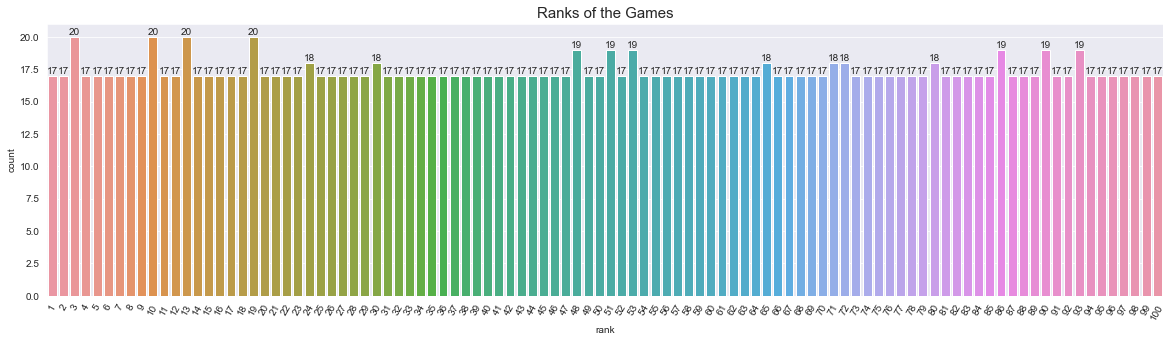

In [57]:
# with seaborn

plt.figure(figsize = (20,5))
sns.countplot(data = df_1, x = df_1['rank'], order = df_1['rank'].value_counts().sort_index().index)
plt.title('Ranks of the Games', fontsize = 15)
plt.xticks(rotation = 60)

for index, value in enumerate(df_1['rank'].value_counts().sort_index().values):
    plt.text(index,value,str(value), ha = 'center', va = 'bottom')
    
plt.show()

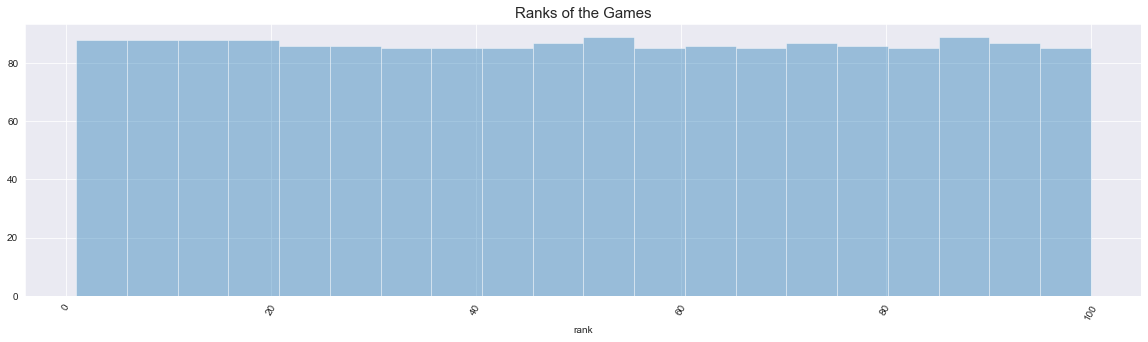

In [58]:
# with seaborn

plt.figure(figsize = (20,5))
sns.distplot(a = df_1['rank'], kde = False, bins = 20)
plt.title('Ranks of the Games', fontsize = 15)
plt.xticks(rotation = 60)
plt.show()

In [59]:
# with plotly

fig = px.histogram(df_1, x = 'rank', title = 'Ranks of the Games')
fig.show()

**'total_ratings' Column**

 - A column containing numeric values. 
 - It shows the sum of star_ratings columns. 

In [60]:
data_describe_num('total_ratings')

Count       : 1730
Mean        : 1064331.9196531791
Std         : 3428258.263396888
Min         : 32993
Q1          : 175999.25
Median(Q2)  : 428606.5
Q3          : 883797.0
Max         : 86273129
Mode        : ModeResult(mode=array([406124], dtype=int64), count=array([4]))
Range       : 86240136
IQR         : 707797.75
Num_Outliers: 167
Outliers    : [86273129, 37276732, 26663595, 17971552, 14464235, 13572148, 11936964, 9633929, 7578630, 6268377, 5681934, 5471344, 4801658, 4710639, 4564398, 4496723, 4464668, 4221389, 4215808, 4159837, 4112075, 3987062, 3516024, 3213257, 3195503, 3140510, 3133361, 2695923, 2670589, 2540439, 2472561, 2380639, 2365838, 2271977, 2131549, 2100984, 2083413, 2006745, 1985016, 1949497, 21820451, 14541662, 4273420, 2544322, 2258595, 2078458, 2016845, 35665901, 7202013, 6960814, 5903477, 5402149, 5367599, 4919742, 4816448, 4565220, 4100452, 3398125, 3290970, 2858076, 2342083, 2222817, 2156973, 2096404, 2062961, 1988570, 7512316, 2516777, 2430531, 2131083, 21138

In [61]:
first_look('total_ratings')

column name :  total_ratings
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1699
Duplicates     :  0
32993       1
33173       1
34140       1
34434       1
34781       1
           ..
31367945    1
35665901    1
37276732    1
55766763    1
86273129    1
Name: total_ratings, Length: 1699, dtype: int64


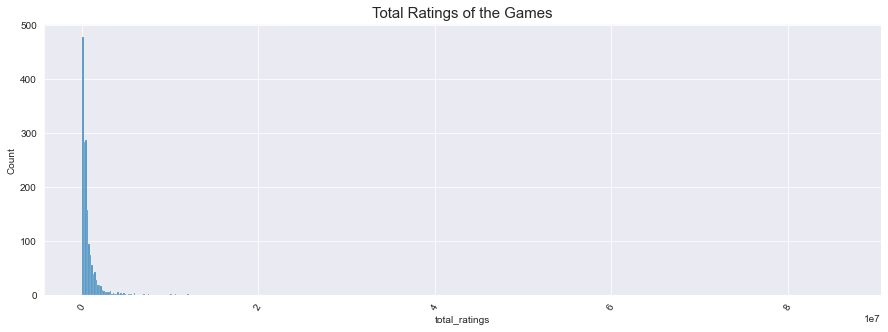

In [62]:
# with seaborn

plt.figure(figsize = (15,5))
sns.histplot(x = df_1['total_ratings'], data = df_1, bins = 500)
plt.title('Total Ratings of the Games', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [63]:
# with plotly

fig = px.histogram(df_1, x = 'total_ratings', title = 'Total Ratings of the Games')
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.update_layout(xaxis = {'categoryorder':'total descending'})

fig.show()

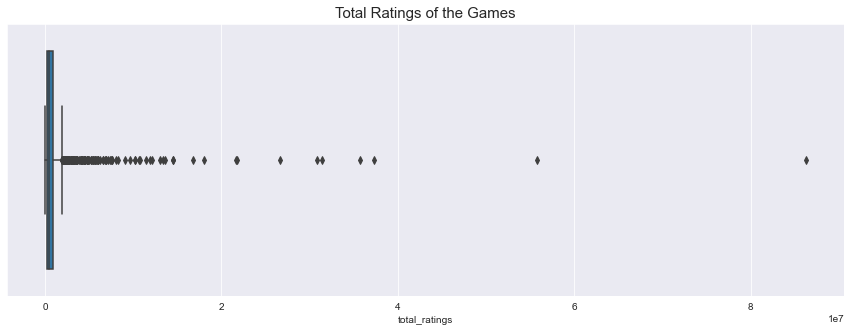

In [64]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='total_ratings')
plt.title('Total Ratings of the Games', fontsize = 15)
plt.show()

In [65]:
# with plotly

fig = px.box(df_1, x = 'total_ratings', hover_data = df_1[['title','category']], title = 'Total Ratings of the Games')
fig.update_traces(quartilemethod = 'inclusive')
fig.show()

***- Most of the ratings are in the range of 0-500.000***

***- The mean is greater than the median***

***- We have highly right skewed distribution because of outliers on the maximum side of the distribution***

***- Because of outliers, it would be a good idea to look for the median based approach since median is more resilient to outliers than mean***

**'installs_in_million' Column**

 - A column containing numeric values. 
 - It shows the installation number of the games. 

In [66]:
data_describe_num('installs_in_million')

Count       : 1730
Mean        : 29.176184971098262
Std         : 60.269906786539664
Min         : 0.1
Q1          : 5.0
Median(Q2)  : 10.0
Q3          : 50.0
Max         : 1000.0
Mode        : ModeResult(mode=array([10.]), count=array([805]))
Range       : 999.9
IQR         : 45.0
Num_Outliers: 14
Outliers    : [500.0, 500.0, 500.0, 500.0, 1000.0, 500.0, 500.0, 1000.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]


In [67]:
first_look('installs_in_million')

column name :  installs_in_million
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  9
Duplicates     :  0
0.1         3
0.5        15
1.0       192
5.0       245
10.0      805
50.0      252
100.0     204
500.0      12
1000.0      2
Name: installs_in_million, dtype: int64


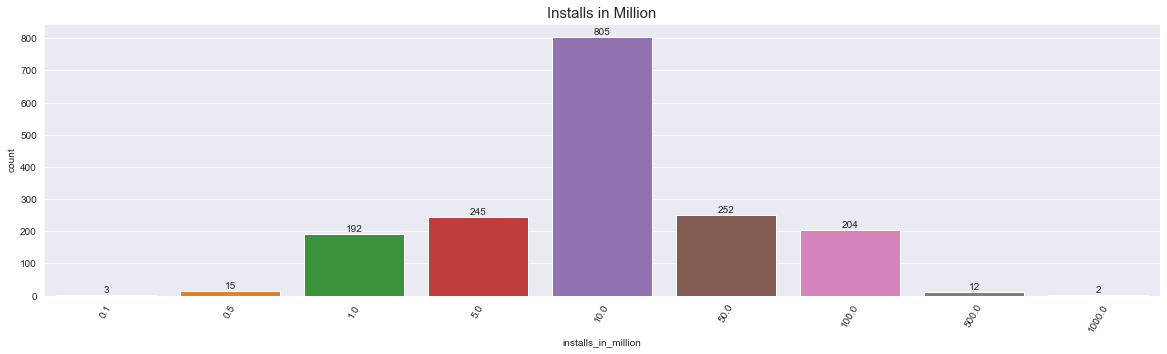

In [67]:
# with seaborn

plt.figure(figsize = (20,5))
sns.countplot(x = df_1['installs_in_million'], data = df_1, order = df_1['installs_in_million'].value_counts().sort_index().index)
plt.title('Installs in Million', fontsize = 15)
plt.xticks(rotation = 60)

for index, value in enumerate(df_1['installs_in_million'].value_counts().sort_index().values):
    plt.text(index,value,str(value), ha = 'center', va= 'bottom')
    
plt.show()

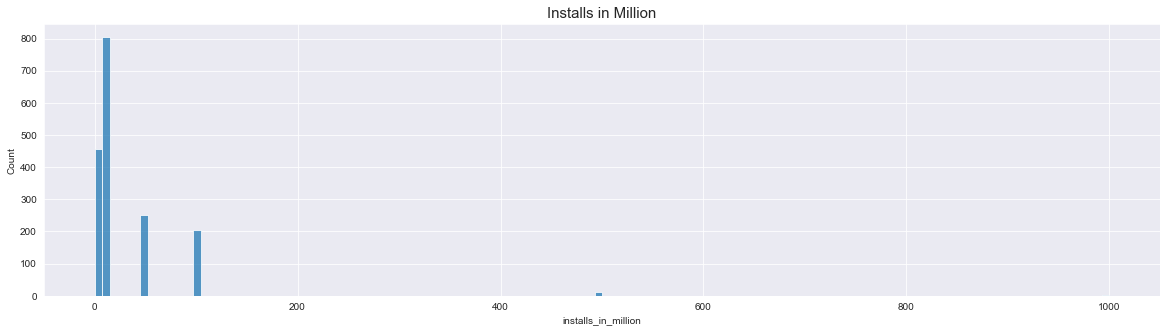

In [68]:
# with seaborn

plt.figure(figsize = (20,5))
sns.histplot(data=df_1, x ="installs_in_million")
plt.title('Installs in Million', fontsize = 15)
plt.show()

In [69]:
# with plotly

fig = px.box(df_1, x = 'installs_in_million', hover_data = df_1[['title','category']], title = 'Installs in Million')
fig.update_traces(quartilemethod = 'inclusive')
fig.show()

***- We have rightly skewed distribution***

***- Just like total ratings column, installs_in_million columns also has outliers on the maximum side***

***- By looking at just boxplot, you may think that there are only two outliers but that may be wrong. Even though installs_in_million column seems like numerical type, it is actually categorical column because there are only 9 possible values in this column. Because of this, in box plot, outliers stacked on each other. You may understand better by looking at value counts of this column. 14 outliers in this column***

***- Most of the values are between 1M and 100M***

***- Size of the outliers definitely affect mean value and distributions***

***- Difference between mean value and median value is really huge (mean = 29.1M,median= 10M)***

**'average_rating' Column**


 - A column containing numeric values. 
 - It shows the average of the ratings. 

In [70]:
data_describe_num('average_rating')

Count       : 1730
Mean        : 3.908092485549133
Std         : 0.29088931331778645
Min         : 2
Q1          : 4.0
Median(Q2)  : 4.0
Q3          : 4.0
Max         : 4
Mode        : ModeResult(mode=array([4], dtype=int64), count=array([1572]))
Range       : 2
IQR         : 0.0
Num_Outliers: 158
Outliers    : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [71]:
first_look('average_rating')

column name :  average_rating
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  3
Duplicates     :  0
2       1
3     157
4    1572
Name: average_rating, dtype: int64


In [72]:
# with plotly

fig = px.histogram(df_1, x = 'average_rating', title = 'Average Rating')
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))

fig.show()

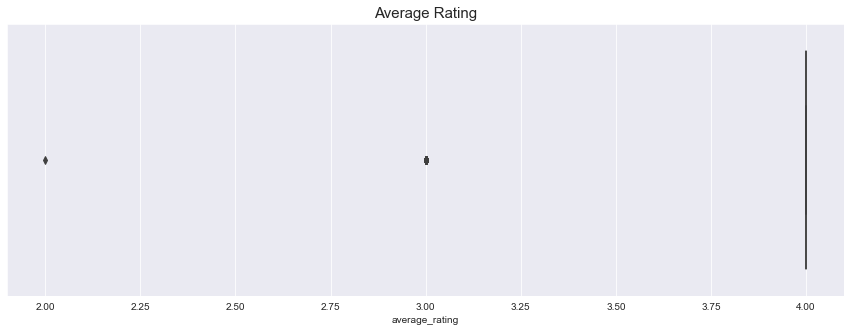

In [73]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='average_rating')
plt.title('Average Rating', fontsize = 15)
plt.show()

***- This time the outliers on the minimum side***

***- The mean and median values are almost equal***

***- Most of the values are 4***

***- We have 158 outliers***

**'growth_30_days' Column**

 - A column containing numeric values. 

In [74]:
data_describe_num('growth_30_days')

Count       : 1730
Mean        : 321.7358959537557
Std         : 6017.174684691619
Min         : 0.0
Q1          : 0.1
Median(Q2)  : 0.5
Q3          : 1.7
Max         : 227105.7
Mode        : ModeResult(mode=array([0.]), count=array([269]))
Range       : 227105.7
IQR         : 1.5999999999999999
Num_Outliers: 205
Outliers    : [692.7, 1082.3, 4.2, 6.4, 15364.2, 6.2, 517.9, 14.4, 2283.0, 11.7, 1027.4, 5.0, 7.0, 5156.3, 5.0, 7.4, 1446.6, 421.7, 234.3, 4.5, 6.5, 9.2, 5.6, 4.4, 7.3, 4.6, 1117.1, 77.5, 2948.2, 990.2, 250.5, 528.5, 7.8, 2212.2, 8.2, 4.8, 6.5, 4.7, 5.7, 9.4, 16.5, 6.0, 293.1, 37994.4, 5.3, 55880.6, 4.3, 5.7, 4.3, 4.3, 4.3, 10.0, 4.7, 4.7, 4.7, 74.3, 393.4, 227105.7, 4.9, 225.1, 5550.2, 6.1, 54.5, 11.4, 106.2, 4.2, 252.7, 5.4, 5.9, 196.3, 5.5, 10.0, 5.5, 625.9, 1914.7, 24.0, 508.1, 11.1, 11.0, 10.0, 4.9, 5446.9, 4.6, 8.2, 4.6, 2013.3, 5.6, 5.9, 5.4, 8.9, 6.9, 4.5, 12.5, 87.5, 14.5, 6.9, 2428.7, 4.4, 5.9, 5.3, 8.9, 76.2, 19.1, 10.9, 6.8, 19.7, 1446.7, 4.6, 4.3, 21.2, 7.3, 768.5

In [75]:
first_look('growth_30_days')

column name :  growth_30_days
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  186
Duplicates     :  0
0.0         269
0.1         234
0.2         137
0.3         114
0.4          87
           ... 
28062.9       1
37994.4       1
55880.6       1
69928.5       1
227105.7      1
Name: growth_30_days, Length: 186, dtype: int64


In [76]:
# with plotly

fig = px.histogram(df_1, x = 'growth_30_days', title = 'Growth in 30 Days')
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.show()

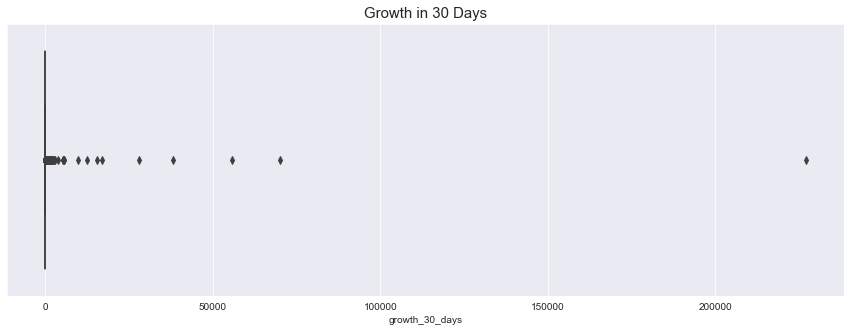

In [77]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='growth_30_days')
plt.title('Growth in 30 Days', fontsize = 15)
plt.show()

***- A right-skewed distribution here***

***- Outliers on the maximum side***

***- Because of the outlier, the difference between mean and median values is huge.***

***- We have 205 outliers***

**'growth_60_days' Column**

 - A column containing numeric values. 

In [78]:
data_describe_num('growth_60_days')

Count       : 1730
Mean        : 122.5549710982664
Std         : 2253.24019506069
Min         : 0.0
Q1          : 0.2
Median(Q2)  : 1.0
Q3          : 3.3
Max         : 69441.4
Mode        : ModeResult(mode=array([0.]), count=array([180]))
Range       : 69441.4
IQR         : 3.0999999999999996
Num_Outliers: 183
Outliers    : [4012.8, 7584.9, 8.5, 9.0, 14.5, 9.0, 15.5, 22.8, 27.8, 17.4, 10.2, 60.6, 17.0, 11.4, 19.4, 264.0, 8.6, 14.0, 14.0, 19.1, 11.2, 9.6, 16.5, 863.6, 10.4, 1107.1, 15.8, 9.4, 20.5, 8.2, 10.4, 82.3, 13.4, 12.8, 42875.2, 11.4, 15483.9, 10.7, 21.9, 30.6, 17.2, 11.6, 69441.4, 9.0, 121.1, 8.9, 8.9, 8.9, 27.8, 13.1, 13.1, 13.1, 148.5, 12.1, 14.5, 13.5, 22.9, 9.6, 9.7, 12.0, 12.9, 14.0, 19.3, 11.8, 1251.8, 49.3, 26.7, 23.1, 24.7, 9.8, 10.2, 10.0, 18.8, 11.1, 9.3, 12.3, 15.1, 11.9, 672.7, 23.3, 14.7, 10.0, 33.0, 174.9, 29.6, 8.3, 16.6, 8.3, 8.9, 8.3, 13.6, 12.1, 21.0, 8.6, 152.4, 43.7, 498.5, 30.2, 15.9, 62.5, 426.0, 10.7, 718.2, 11.5, 56.5, 16.0, 269.5, 13.1, 13.3, 251.7, 13.3

In [79]:
first_look('growth_60_days')

column name :  growth_60_days
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  206
Duplicates     :  0
0.0        180
0.1        166
0.2        104
0.3         89
0.4         58
          ... 
7584.9       1
15483.9      1
41869.7      1
42875.2      1
69441.4      1
Name: growth_60_days, Length: 206, dtype: int64


In [80]:
# with plotly

fig = px.histogram(df_1, x = 'growth_60_days', title = 'Growth in 60 Days')
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.show()

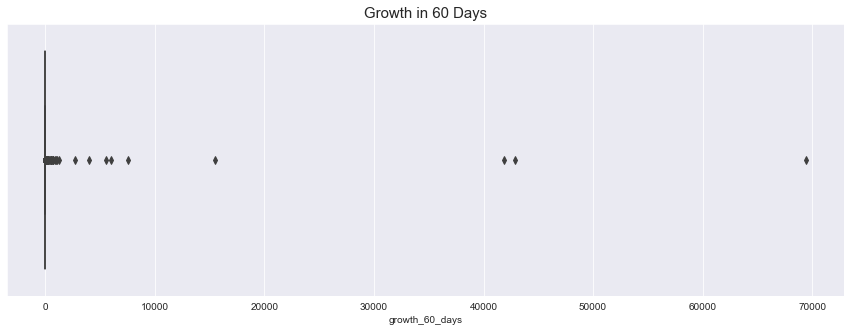

In [81]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='growth_60_days')
plt.title('Growth in 60 Days', fontsize = 15)
plt.show()

***- Again a right-skewed distribution here***

***- Outliers on the maximum side***

***- Because of the outlier, the difference between mean and median values is huge.***

***- We have 183 outliers***

**Considering that the explanations above make it clear from which point of view we can conduct univariate analysis, I continue without further explanations.**

**'5_star_ratings' Column**

 - A column containing numeric values. 
 - It shows the count of the 5_star_ratings.

In [82]:
data_describe_num('5_star_ratings')

Count       : 1730
Mean        : 762231.4716763006
Std         : 2537924.2518310277
Min         : 13975
Q1          : 127730.0
Median(Q2)  : 296434.0
Q3          : 619835.75
Max         : 63546766
Mode        : ModeResult(mode=array([299715], dtype=int64), count=array([4]))
Range       : 63532791
IQR         : 492105.75
Num_Outliers: 171
Outliers    : [63546766, 28339753, 18777988, 13018610, 9827328, 10501443, 5954262, 6579369, 5382545, 4509647, 3866308, 4319351, 3884644, 3581634, 3142312, 3497817, 3379550, 2634036, 2874353, 3073534, 2493810, 2776350, 2419540, 2174466, 2486283, 2332406, 2107121, 1922909, 1944649, 1879504, 1841035, 1582549, 1849560, 1561779, 1508264, 1509125, 1394048, 1474331, 16674013, 9517488, 3264905, 1722222, 1659776, 1423448, 27138572, 5220860, 4787054, 4295577, 4290826, 3745457, 3676322, 3184391, 3220230, 3324435, 2395375, 2393224, 1795281, 1816379, 1461686, 1510574, 1726149, 1624579, 1572089, 1512745, 1420595, 5291589, 1927153, 1763377, 1587565, 1541203, 1821678,

In [83]:
first_look('5_star_ratings')

column name :  5_star_ratings
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1697
Duplicates     :  0
13975       1
19715       1
22326       1
22453       1
23468       1
           ..
23837448    1
27138572    1
28339753    1
43346128    1
63546766    1
Name: 5_star_ratings, Length: 1697, dtype: int64


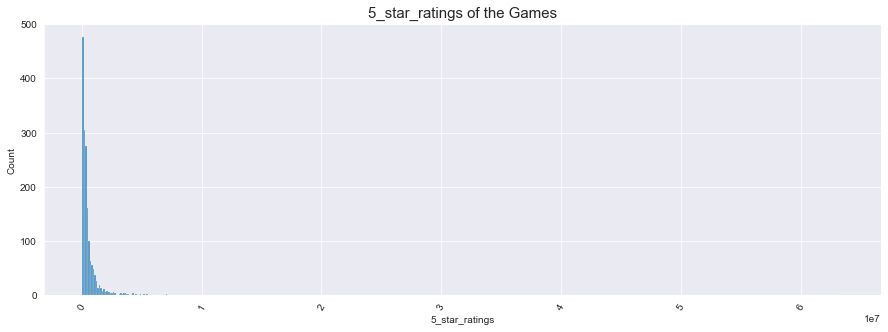

In [84]:
# with seaborn

plt.figure(figsize = (15,5))
sns.histplot(x = df_1['5_star_ratings'], data = df_1, bins = 500)
plt.title('5_star_ratings of the Games', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

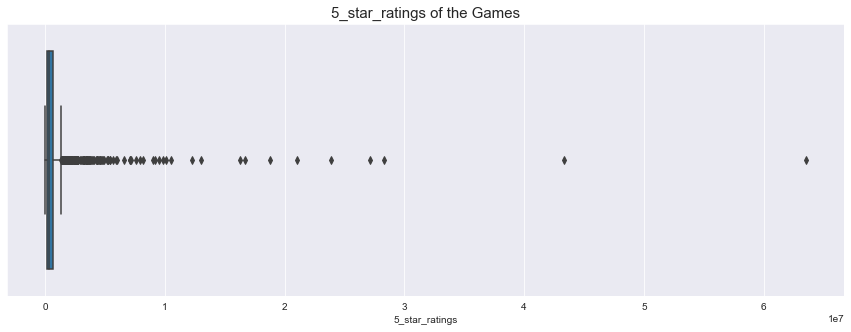

In [85]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='5_star_ratings')
plt.title('5_star_ratings of the Games', fontsize = 15)
plt.show()

**'4_star_ratings' Column**

 - A column containing numeric values. 
 - It shows the count of the 4_star_ratings.

In [86]:
data_describe_num('4_star_ratings')

Count       : 1730
Mean        : 116436.58150289017
Std         : 302075.71411404706
Min         : 2451
Q1          : 20643.0
Median(Q2)  : 50980.5
Q3          : 101814.0
Max         : 5404966
Mode        : ModeResult(mode=array([47121], dtype=int64), count=array([4]))
Range       : 5402515
IQR         : 81171.0
Num_Outliers: 163
Outliers    : [4949507, 2164478, 1812094, 1552950, 2124154, 1274162, 1041297, 991341, 500696, 605510, 527159, 514574, 365380, 397794, 386513, 518453, 576816, 450688, 457806, 463932, 428315, 614755, 421218, 265019, 232254, 409344, 271167, 223625, 272948, 251048, 284687, 267812, 253442, 249413, 253822, 1916826, 1746849, 445397, 323198, 310670, 247385, 3366600, 792543, 831967, 615956, 539449, 583916, 567777, 438320, 532157, 317144, 354636, 283587, 475749, 239968, 773193, 358243, 308402, 308402, 308402, 308402, 301722, 259642, 4176798, 1514188, 1073761, 1239752, 1051014, 1406080, 1105063, 1367797, 1176491, 959679, 1145290, 738250, 617190, 701272, 428334, 486532, 2

In [87]:
first_look('4_star_ratings')

column name :  4_star_ratings
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1692
Duplicates     :  0
2451       1
2471       1
2542       1
2739       1
2774       1
          ..
3366600    1
3645468    1
4176798    1
4949507    1
5404966    1
Name: 4_star_ratings, Length: 1692, dtype: int64


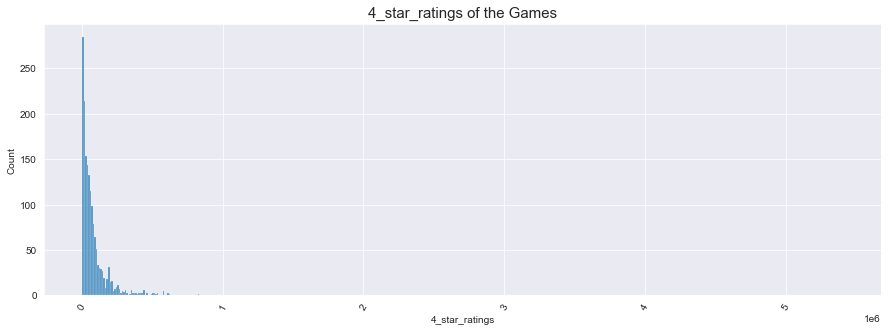

In [88]:
# with seaborn

plt.figure(figsize = (15,5))
sns.histplot(x = df_1['4_star_ratings'], data = df_1, bins = 500)
plt.title('4_star_ratings of the Games', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [89]:
# with plotly

fig = px.box(df_1, x = '4_star_ratings', hover_data = df_1[['title','category']], title = '4_star_ratings of the Games')
fig.update_traces(quartilemethod = 'inclusive')
fig.show()

**'3_star_ratings' Column**

 - A column containing numeric values. 
 - It shows the count of the 3_star_ratings.

In [90]:
data_describe_num('3_star_ratings')

Count       : 1730
Mean        : 57063.06936416185
Std         : 149488.18701119322
Min         : 718
Q1          : 9652.5
Median(Q2)  : 25078.0
Q3          : 52295.0
Max         : 3158756
Mode        : ModeResult(mode=array([16871], dtype=int64), count=array([4]))
Range       : 3158038
IQR         : 42642.5
Num_Outliers: 149
Outliers    : [3158756, 1253185, 1050600, 774012, 1047741, 517273, 853099, 614643, 351523, 319332, 326294, 229990, 135150, 200800, 204843, 223009, 234463, 267931, 254154, 205166, 289428, 242698, 214049, 189630, 118927, 156460, 174340, 133776, 134237, 138333, 149090, 130615, 138706, 118080, 116516, 138751, 131708, 822266, 883965, 217853, 198160, 122549, 221072, 1622695, 404086, 432708, 339838, 214946, 354239, 271954, 318164, 287592, 135048, 204730, 152239, 286985, 120639, 152266, 147447, 135759, 126162, 142281, 369290, 140391, 1534041, 851145, 636763, 599727, 688712, 591119, 542317, 604525, 433227, 483208, 420595, 337096, 303609, 315427, 200017, 256817, 172533, 186

In [91]:
first_look('3_star_ratings')

column name :  3_star_ratings
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1677
Duplicates     :  0
718        1
1053       1
1123       1
1178       1
1215       1
          ..
1534041    1
1622695    1
1655906    1
2276203    1
3158756    1
Name: 3_star_ratings, Length: 1677, dtype: int64


In [92]:
# with plotly

fig = px.histogram(df_1, x = '3_star_ratings', title = '3_star_ratings of the Games')
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.update_layout(xaxis = {'categoryorder':'total descending'})

fig.show()

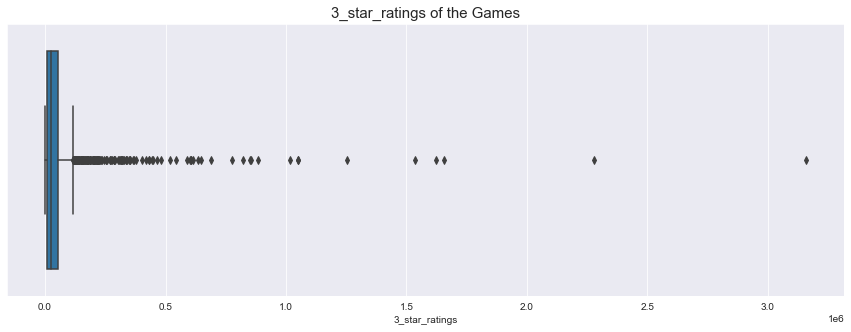

In [93]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='3_star_ratings')
plt.title('3_star_ratings of the Games', fontsize = 15)
plt.show()

**'2_star_ratings' Column**

 - A column containing numeric values. 
 - It shows the count of the 2_star_ratings.

In [94]:
data_describe_num('2_star_ratings')

Count       : 1730
Mean        : 27103.356647398843
Std         : 81521.84637357408
Min         : 266
Q1          : 4262.25
Median(Q2)  : 10675.5
Q3          : 23228.75
Max         : 2122183
Mode        : ModeResult(mode=array([1307], dtype=int64), count=array([4]))
Range       : 2121917
IQR         : 18966.5
Num_Outliers: 163
Outliers    : [2122183, 809821, 713912, 406184, 380670, 268489, 719378, 349003, 238986, 167792, 186593, 98901, 65422, 116460, 111645, 72115, 68644, 164087, 136153, 103198, 156522, 81199, 100008, 118612, 70889, 63835, 107203, 79762, 69845, 60732, 56785, 73581, 65118, 66573, 65989, 53493, 56490, 62099, 65998, 80276, 66639, 53758, 53947, 84146, 423122, 452314, 93681, 74312, 104655, 57560, 53711, 814890, 191098, 188672, 159034, 88100, 150993, 94004, 204384, 139793, 65677, 99007, 95032, 88464, 79343, 71395, 89330, 59488, 68822, 56534, 67909, 56824, 80224, 204053, 88652, 54390, 74294, 52012, 486005, 465627, 399662, 297910, 346244, 264105, 236861, 262575, 128489, 261701

In [95]:
first_look('2_star_ratings')

column name :  2_star_ratings
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1653
Duplicates     :  0
266        1
347        1
358        1
378        1
419        2
          ..
777067     1
809821     1
814890     1
971321     1
2122183    1
Name: 2_star_ratings, Length: 1653, dtype: int64


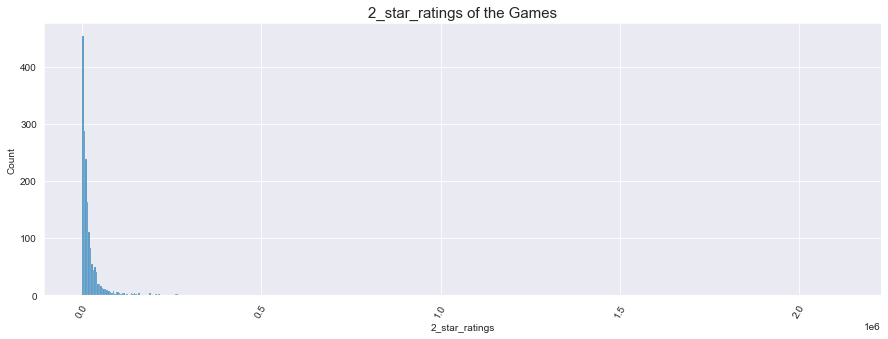

In [96]:
# with seaborn

plt.figure(figsize = (15,5))
sns.histplot(x = df_1['2_star_ratings'], data = df_1, bins = 500)
plt.title('2_star_ratings of the Games', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

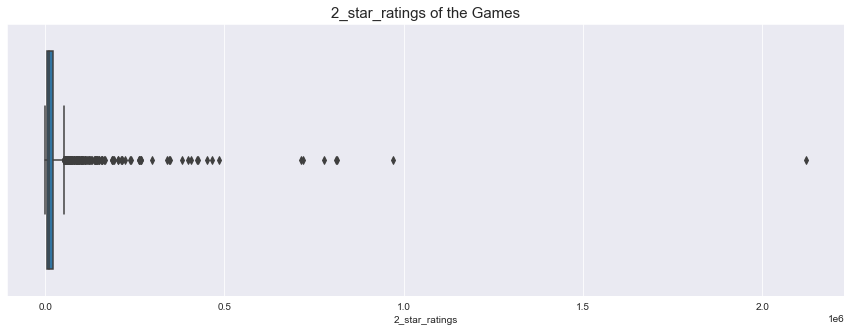

In [97]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='2_star_ratings')
plt.title('2_star_ratings of the Games', fontsize = 15)
plt.show()

**'1_star_ratings' Column**

 - A column containing numeric values. 
 - It shows the count of the 1_star_ratings.

In [98]:
data_describe_num('1_star_ratings')

Count       : 1730
Mean        : 101494.95260115607
Std         : 408256.4885808335
Min         : 545
Q1          : 12812.0
Median(Q2)  : 33686.0
Q3          : 80157.25
Max         : 12495915
Mode        : ModeResult(mode=array([12653], dtype=int64), count=array([4]))
Range       : 12495370
IQR         : 67345.25
Num_Outliers: 167
Outliers    : [12495915, 4709492, 4308998, 2219794, 1084340, 1010778, 3368926, 1099571, 1104879, 666094, 775578, 308525, 351059, 413948, 719082, 185328, 205194, 704645, 493340, 314004, 743997, 272058, 361206, 465528, 287147, 473528, 335849, 248907, 233281, 307605, 261021, 186930, 221763, 317967, 426828, 251599, 299658, 208547, 369937, 216300, 226173, 304119, 327675, 211267, 183958, 1984222, 1941044, 251581, 226427, 338974, 283626, 274417, 2723142, 593424, 720411, 493070, 268825, 532992, 309682, 671187, 385446, 258146, 344374, 366885, 211595, 189489, 368958, 270289, 181994, 318090, 212000, 247501, 185047, 206456, 208125, 228309, 200506, 874188, 419978, 231725,

In [99]:
first_look('1_star_ratings')

column name :  1_star_ratings
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1686
Duplicates     :  0
545         1
581         1
617         1
849         1
897         1
           ..
3764913     1
3768141     1
4308998     1
4709492     1
12495915    1
Name: 1_star_ratings, Length: 1686, dtype: int64


In [100]:
# with plotly

fig = px.histogram(df_1, x = '1_star_ratings', title = '1_star_ratings of the Games')
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 60))
fig.update_layout(xaxis = {'categoryorder':'total descending'})

fig.show()

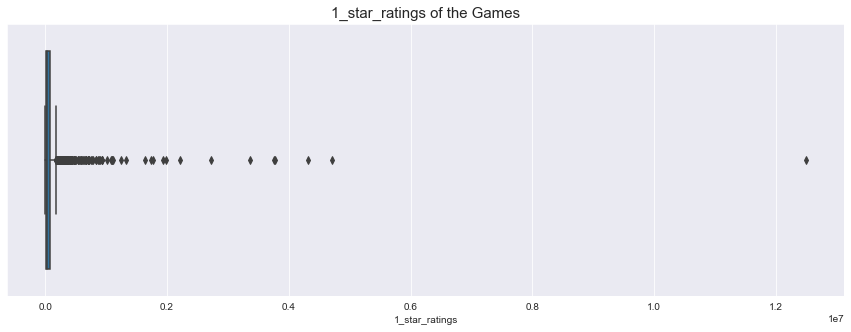

In [101]:
# with seaborn

plt.figure(figsize = (15,5))
sns.boxplot(data = df_1, x ='1_star_ratings')
plt.title('1_star_ratings of the Games', fontsize = 15)
plt.show()

#### Categorical Columns

**'title' Column**

 - A column containing string values. 
 - Shows the names of the games. 

In [102]:
data_describe_obj('title')

Count       : 1730
Unique      : 1675
Top         : Solitaire
Frequency   : 36
Mode        : ModeResult(mode=array(['Solitaire'], dtype=object), count=array([36]))


In [103]:
first_look('title')

column name :  title
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1675
Duplicates     :  0
100 PICS Quiz - Guess Trivia, Logo & Picture Games    1
101 Pics: Photo Quiz                                  1
101 Yüzbir Okey Plus                                  1
101-in-1 Games                                        1
1010! Block Puzzle Game                               1
                                                     ..
피망 섯다                                                 1
한게임 신맞고 : 대한민국 원조 고스톱                                 1
﻿Dragon Land                                          1
🐍 Snakes and Ladders - Free Board Games 🎲             1
🚓🚦Car Driving School Simulator 🚕🚸                     1
Name: title, Length: 1675, dtype: int64


***We have seen above that there are 1730 rows (observation) in the data set. Also, there was no duplicate line. But when the 'title' column is examined, it is seen that there are 1675 unique values. Accordingly, we can conclude that more than one observation is entered in the data set for some games. Games with more than one data entry are shown below.*** 

In [104]:
title_count = df_1['title'].value_counts().sort_values(ascending = False).to_frame()
title_count[title_count['title'] > 1]['title']

Solitaire                    36
Word Search                   9
Spider Solitaire              7
Bubble Shooter                4
Sudoku                        2
Real Racing 3                 2
The Simpsons™: Tapped Out     2
Name: title, dtype: int64

In [105]:
df_1[df_1['title'] == 'Solitaire']

,rank,title,total_ratings,installs_in_million,average_rating,growth_30_days,growth_60_days,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,5_star_percent,4_star_percent,3_star_percent,2_star_percent,1_star_percent,paid
402,3,Solitaire,1590733,100.0,4,0.4,0.9,GAME CARD,1117298,308402,82191,25750,57090,70.24,19.39,5.17,1.62,3.59,False
403,3,Solitaire,1590733,100.0,4,0.4,0.9,GAME CARD,431463,90350,40065,15998,70189,66.58,13.94,6.18,2.47,10.83,False
404,3,Solitaire,1590733,100.0,4,0.4,0.9,GAME CARD,418115,47121,16871,6574,18567,82.43,9.29,3.33,1.30,3.66,False
405,3,Solitaire,1590733,100.0,4,0.4,0.9,GAME CARD,299715,68177,20617,4959,12653,73.80,16.79,5.08,1.22,3.12,False
412,10,Solitaire,648068,50.0,4,0.0,0.0,GAME CARD,1117298,308402,82191,25750,57090,70.24,19.39,5.17,1.62,3.59,False
413,10,Solitaire,648068,50.0,4,0.0,0.0,GAME CARD,431463,90350,40065,15998,70189,66.58,13.94,6.18,2.47,10.83,False
414,10,Solitaire,648068,50.0,4,0.0,0.0,GAME CARD,418115,47121,16871,6574,18567,82.43,9.29,3.33,1.30,3.66,False
415,10,Solitaire,648068,50.0,4,0.0,0.0,GAME CARD,299715,68177,20617,4959,12653,73.80,16.79,5.08,1.22,3.12,False
418,13,Solitaire,507250,50.0,4,0.9,1.9,GAME CARD,1117298,308402,82191,25750,57090,70.24,19.39,5.17,1.62,3.59,False
419,13,Solitaire,507250,50.0,4,0.9,1.9,GAME CARD,431463,90350,40065,15998,70189,66.58,13.94,6.18,2.47,10.83,False


***As seen above, although the same names are entered as 'title', there are differences in the values entered in other columns. From my review on the Google Store, there are different games under the name 'Solitaire' with different front and back attachments.*** 

**'category' Column**

 - A column containing string values. 
 - Shows the category of the games. 

In [106]:
data_describe_obj('category')

Count       : 1730
Unique      : 17
Top         : Solitaire
Frequency   : 36
Mode        : ModeResult(mode=array(['GAME CARD'], dtype=object), count=array([126]))


In [107]:
first_look('category')

column name :  category
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  17
Duplicates     :  0
GAME ACTION          100
GAME ADVENTURE       100
GAME ARCADE          100
GAME BOARD           100
GAME CARD            126
GAME CASINO          100
GAME CASUAL          100
GAME EDUCATIONAL     100
GAME MUSIC           100
GAME PUZZLE          100
GAME RACING          100
GAME ROLE PLAYING    100
GAME SIMULATION      100
GAME SPORTS          100
GAME STRATEGY        100
GAME TRIVIA          100
GAME WORD            104
Name: category, dtype: int64


In [108]:
df_1['category'].value_counts(normalize = True)

GAME CARD            0.072832
GAME WORD            0.060116
GAME PUZZLE          0.057803
GAME TRIVIA          0.057803
GAME STRATEGY        0.057803
GAME SPORTS          0.057803
GAME SIMULATION      0.057803
GAME ROLE PLAYING    0.057803
GAME RACING          0.057803
GAME ACTION          0.057803
GAME ADVENTURE       0.057803
GAME EDUCATIONAL     0.057803
GAME CASUAL          0.057803
GAME CASINO          0.057803
GAME BOARD           0.057803
GAME ARCADE          0.057803
GAME MUSIC           0.057803
Name: category, dtype: float64

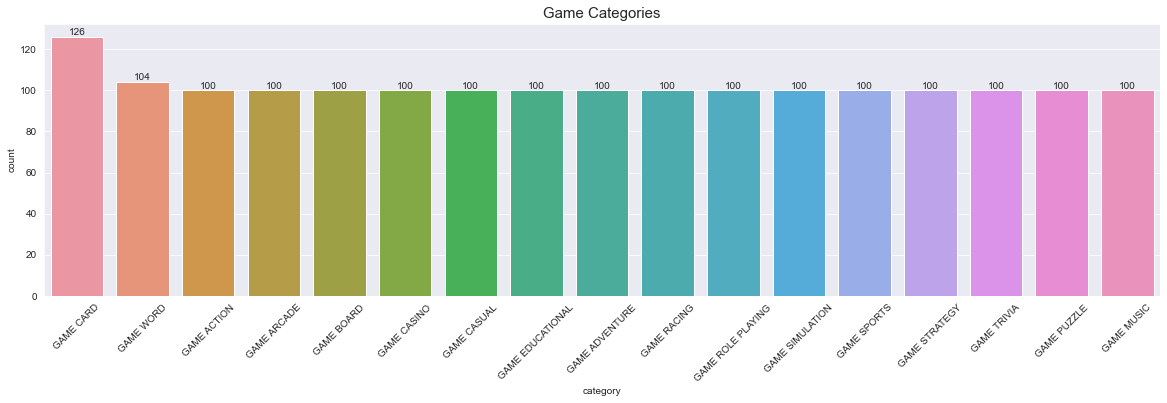

In [109]:
# with seaborn

plt.figure(figsize = (20,5))
sns.countplot(data = df_1, x = "category", order = df_1['category'].value_counts().sort_values(ascending = False).index)
plt.title('Game Categories', fontsize = 15)
plt.xticks(rotation = 45)


for index, value in enumerate(df_1['category'].value_counts().sort_values(ascending = False).values):
    plt.text(index,value,str(value), ha = 'center', va= 'bottom')
    
plt.show()

In [110]:
# with plotly

fig = px.pie(df, values = df['category'].value_counts(), 
             names = (df['category'].value_counts()).index, 
             title = 'Game Categories')
fig.show()

***- Almost all categories have the same size.***

**'paid' Column**

 - A column containing boolean values. 
 - Shows whether the games are paid or not.

In [111]:
data_describe_obj('paid')

Count       : 1730
Unique      : 2
Top         : Solitaire
Frequency   : 36
Mode        : ModeResult(mode=array([False]), count=array([1723]))


In [112]:
first_look('paid')

column name :  paid
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  2
Duplicates     :  0
False    1723
True        7
Name: paid, dtype: int64


In [113]:
# with plotly

fig = px.histogram(df, x = 'paid', title = 'Paid')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

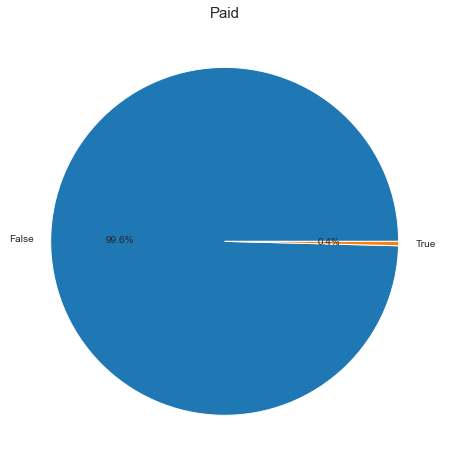

In [114]:
# with seaborn

plt.figure(figsize = (8,8))
plt.pie(df_1['paid'].value_counts().values, labels = df_1['paid'].value_counts().index, labeldistance = 1.1,\
        startangle = 0, autopct = '%1.1f%%')
plt.title('Paid', fontsize = 15)
plt.show()

***- 99.6% of the games are free.***

***- For this reason, I think that the "paid" column will not contribute much to the analysis.***

### Bivariate Analysis

#### Now, let's go on looking the relationships between the columns

In [115]:
ranks_by_category = df_1.groupby('category')['rank'].mean().sort_values(ascending = False)
ranks_by_category

category
GAME WORD            50.528846
GAME PUZZLE          50.500000
GAME TRIVIA          50.500000
GAME STRATEGY        50.500000
GAME SPORTS          50.500000
GAME SIMULATION      50.500000
GAME ROLE PLAYING    50.500000
GAME RACING          50.500000
GAME ACTION          50.500000
GAME ADVENTURE       50.500000
GAME EDUCATIONAL     50.500000
GAME CASUAL          50.500000
GAME CASINO          50.500000
GAME BOARD           50.500000
GAME ARCADE          50.500000
GAME MUSIC           50.500000
GAME CARD            48.920635
Name: rank, dtype: float64

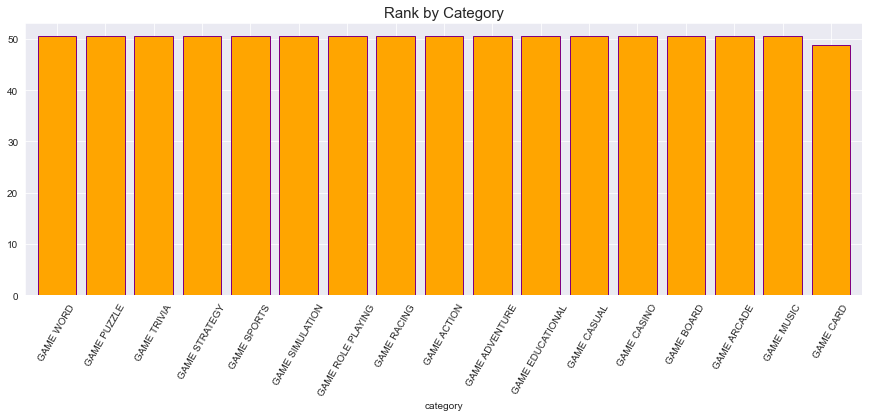

In [116]:
# with pandas

plt.figure(figsize = (15,5))
ranks_by_category.plot(kind = "bar", width = 0.8, color = 'orange', edgecolor = 'purple')
plt.title('Rank by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [117]:
fig = px.bar(ranks_by_category, x = ranks_by_category.index, y = ranks_by_category.values, labels = {'y':'rank'}, 
             title = 'Rank by Category')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

***- We see that the mean values of the "rank" column are almost equally distributed according to the game categories.***

***- Games in the 'Game Card' category received a lower rank than other category games.***

In [118]:
total_ratings_by_category = df_1.groupby('category')['total_ratings'].mean().sort_values(ascending = False)
total_ratings_by_category

category
GAME ACTION          4.011344e+06
GAME CASUAL          2.470866e+06
GAME STRATEGY        1.856570e+06
GAME ARCADE          1.793780e+06
GAME SPORTS          1.353829e+06
GAME RACING          1.139027e+06
GAME PUZZLE          9.466929e+05
GAME SIMULATION      9.341417e+05
GAME ADVENTURE       8.935617e+05
GAME ROLE PLAYING    7.087648e+05
GAME BOARD           4.457431e+05
GAME WORD            3.943603e+05
GAME CASINO          3.619031e+05
GAME CARD            3.326041e+05
GAME TRIVIA          2.982217e+05
GAME MUSIC           2.163020e+05
GAME EDUCATIONAL     1.529804e+05
Name: total_ratings, dtype: float64

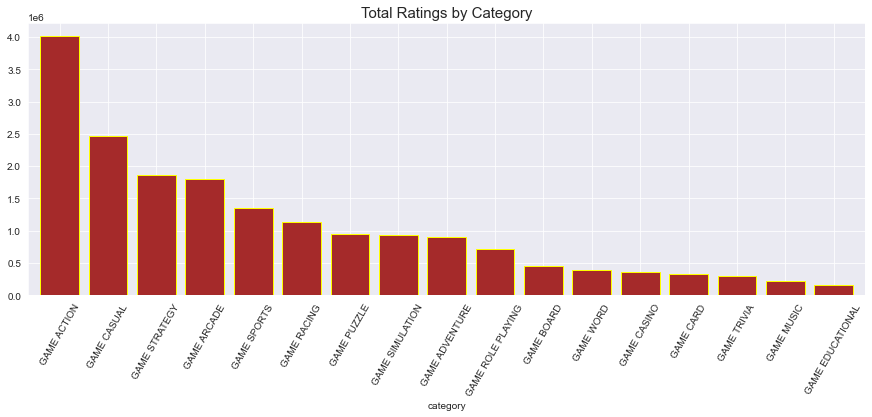

In [119]:
# with pandas

plt.figure(figsize = (15,5))
total_ratings_by_category.plot(kind = "bar", width = 0.8, color = 'brown', edgecolor = 'yellow')
plt.title('Total Ratings by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [120]:
fig = px.bar(total_ratings_by_category, x = total_ratings_by_category.index, y = total_ratings_by_category.values, 
             labels = {'y':'total_ratings'}, title = 'Total Ratings by Category')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

***- Games in the "Game Action", "Game Casual" and "Game Strategy" categories share the top 3 places in terms of "total ratings".***

***- It is regrettable that the games in the "Game Educational" category are in the last place.***

In [121]:
install_by_category = df_1.groupby('category')['installs_in_million'].mean().sort_values(ascending = False)
install_by_category

category
GAME ACTION          74.100000
GAME ARCADE          71.610000
GAME CASUAL          63.970000
GAME RACING          46.750000
GAME PUZZLE          36.210000
GAME SPORTS          33.610000
GAME SIMULATION      27.710000
GAME STRATEGY        23.910000
GAME BOARD           21.230000
GAME ADVENTURE       18.030000
GAME EDUCATIONAL     17.895000
GAME ROLE PLAYING    14.080000
GAME MUSIC           12.487000
GAME CARD            12.484127
GAME WORD            12.317308
GAME CASINO           7.715000
GAME TRIVIA           6.901000
Name: installs_in_million, dtype: float64

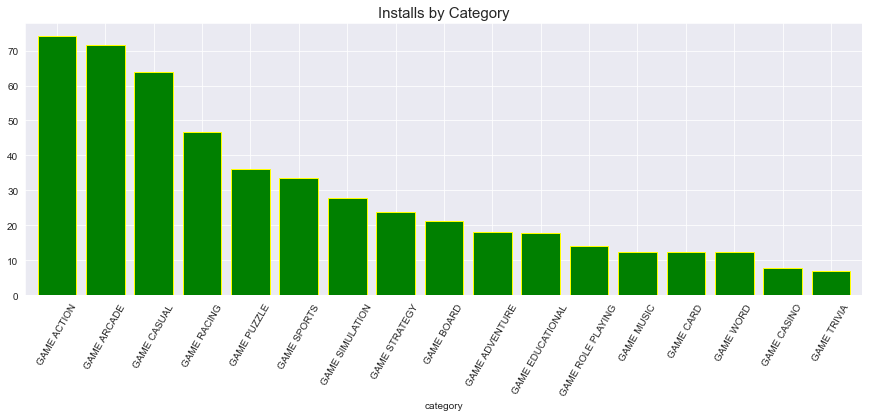

In [122]:
# with pandas

plt.figure(figsize = (15,5))
install_by_category.plot(kind = "bar", width = 0.8, color = 'green', edgecolor = 'yellow')
plt.title('Installs by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [123]:
fig = px.bar(install_by_category, x = install_by_category.index, y = install_by_category.values,
            labels = {'y':'installs_in_million'}, title = 'Installs by Category')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

***- It can be inferred from bar chart above that games in the "Action", "Arcade" and "Casual" categories are installed significantly more than other games.***

In [124]:
growth = df_1.groupby('category')[['growth_30_days', 'growth_60_days']].mean()
growth

,growth_30_days,growth_60_days
category,,
GAME ACTION,18.808000,118.294000
GAME ADVENTURE,259.101000,6.084000
GAME ARCADE,58.924000,21.970000
GAME BOARD,34.445000,587.891000
GAME CARD,746.598413,555.337302
GAME CASINO,2335.253000,2.193000
GAME CASUAL,36.020000,14.812000
GAME EDUCATIONAL,102.455000,14.748000
GAME MUSIC,24.626000,22.160000


In [125]:
# with plotly

fig = px.line(growth, y = ['growth_30_days', 'growth_60_days'],
             labels = {'category': 'Category', 'value': 'Growth'})
fig.show()

***- The games in the "Casino" and "Trivia" categories have significantly higher 30-day growth values compared to other games,***

***- It is seen that the 60-day growth values of the games in the "Arcade", "Card" and "Trivia" category are significantly higher than the other games.***

In [126]:
growth30_by_category = df_1.groupby('category')['growth_30_days'].mean().sort_values(ascending = False)
growth30_by_category

category
GAME CASINO          2335.253000
GAME TRIVIA          1079.680000
GAME CARD             746.598413
GAME ADVENTURE        259.101000
GAME ROLE PLAYING     209.979000
GAME RACING           207.103000
GAME SPORTS           159.543000
GAME EDUCATIONAL      102.455000
GAME ARCADE            58.924000
GAME PUZZLE            44.362000
GAME CASUAL            36.020000
GAME BOARD             34.445000
GAME MUSIC             24.626000
GAME WORD              22.433654
GAME ACTION            18.808000
GAME STRATEGY          18.281000
GAME SIMULATION        13.406000
Name: growth_30_days, dtype: float64

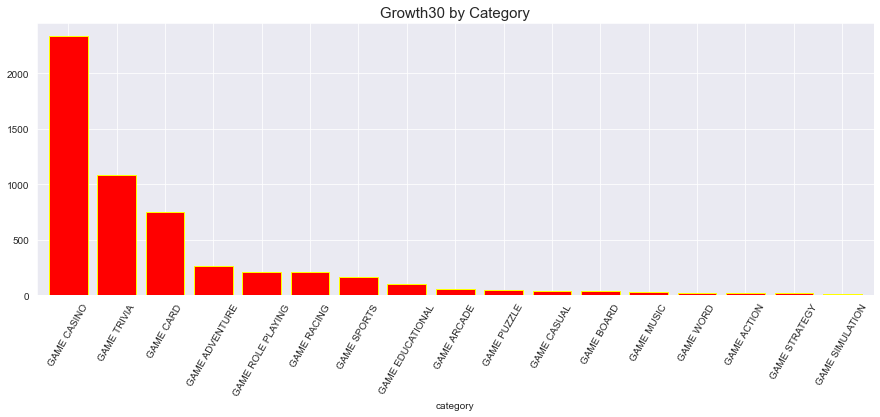

In [127]:
# with pandas

plt.figure(figsize = (15,5))
growth30_by_category.plot(kind = "bar", width = 0.8, color = 'red', edgecolor = 'yellow')
plt.title('Growth30 by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [128]:
fig = px.bar(growth30_by_category, x = growth30_by_category.index, y = growth30_by_category.values,
            labels = {'y':'growth_30_days'}, title = 'Growth30 by Category')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [129]:
growth60_by_category = df_1.groupby('category')['growth_60_days'].mean().sort_values(ascending = False)
growth60_by_category

category
GAME BOARD           587.891000
GAME CARD            555.337302
GAME STRATEGY        435.440000
GAME ACTION          118.294000
GAME RACING           88.963000
GAME WORD             55.725000
GAME MUSIC            22.160000
GAME ARCADE           21.970000
GAME SIMULATION       20.196000
GAME CASUAL           14.812000
GAME EDUCATIONAL      14.748000
GAME PUZZLE           12.062000
GAME SPORTS            8.492000
GAME TRIVIA            6.180000
GAME ADVENTURE         6.084000
GAME ROLE PLAYING      3.037000
GAME CASINO            2.193000
Name: growth_60_days, dtype: float64

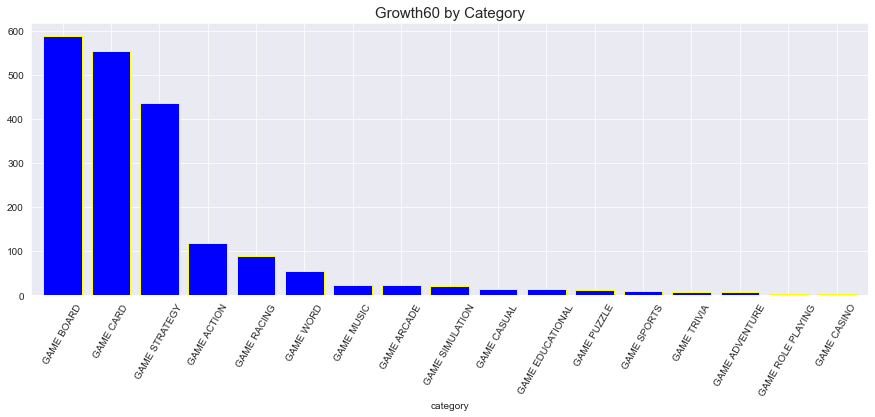

In [130]:
# with pandas

plt.figure(figsize = (15,5))
growth60_by_category.plot(kind = "bar", width = 0.8, color = 'blue', edgecolor = 'yellow')
plt.title('Growth60 by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [131]:
fig = px.bar(growth60_by_category, x = growth60_by_category.index, y = growth60_by_category.values,
            labels = {'y':'growth_60_days'}, title = 'Growth60 by Category')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [132]:
stars_1_by_category = df_1.groupby('category')['1_star_percent'].mean().sort_values(ascending = False)
stars_1_by_category

category
GAME MUSIC           11.448900
GAME EDUCATIONAL     11.316700
GAME ACTION          11.259200
GAME STRATEGY        10.301700
GAME ADVENTURE       10.096800
GAME SPORTS          10.078900
GAME RACING           9.912000
GAME ARCADE           9.798600
GAME ROLE PLAYING     9.675400
GAME BOARD            9.324100
GAME TRIVIA           8.888600
GAME SIMULATION       8.700000
GAME CASUAL           8.469200
GAME CASINO           7.157200
GAME CARD             6.915317
GAME PUZZLE           6.885300
GAME WORD             5.789904
Name: 1_star_percent, dtype: float64

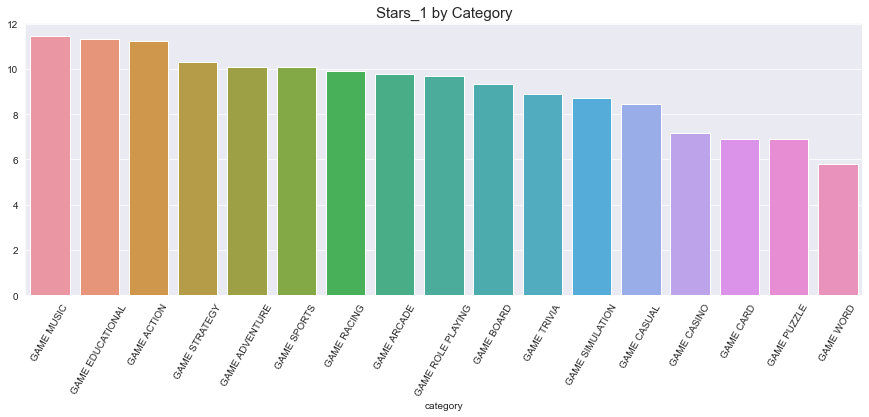

In [133]:
# with seaborn

plt.figure(figsize = (15,5))
sns.barplot(data = df_1, x = stars_1_by_category.index, y = stars_1_by_category.values)
plt.title('Stars_1 by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [135]:
stars_2_by_category = df_1.groupby('category')['2_star_percent'].mean().sort_values(ascending = False)
stars_2_by_category

category
GAME EDUCATIONAL     3.413800
GAME MUSIC           3.402300
GAME ADVENTURE       3.024500
GAME ARCADE          2.898500
GAME RACING          2.851500
GAME SIMULATION      2.850300
GAME TRIVIA          2.839000
GAME ACTION          2.803500
GAME SPORTS          2.803000
GAME ROLE PLAYING    2.722000
GAME CASUAL          2.630500
GAME STRATEGY        2.605100
GAME PUZZLE          2.524400
GAME BOARD           2.478200
GAME WORD            2.203269
GAME CASINO          2.039900
GAME CARD            2.008333
Name: 2_star_percent, dtype: float64

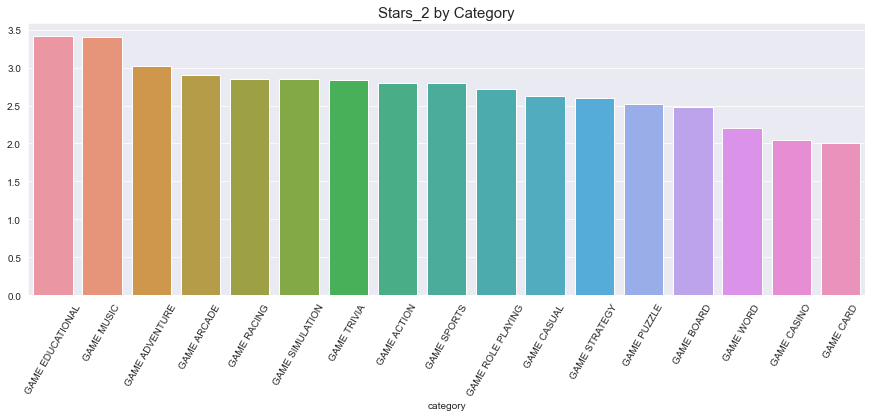

In [136]:
# with seaborn

plt.figure(figsize = (15,5))
sns.barplot(data = df_1, x = stars_2_by_category.index, y = stars_2_by_category.values)
plt.title('Stars_2 by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [137]:
fig = px.bar(stars_2_by_category, x = stars_2_by_category.index, y = stars_2_by_category.values,
            labels = {'y':'2_star_percent'}, title = 'Stars_2 by Category')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [138]:
stars_3_by_category = df_1.groupby('category')['3_star_percent'].mean().sort_values(ascending = False)
stars_3_by_category

category
GAME TRIVIA          6.575100
GAME MUSIC           6.569400
GAME SPORTS          6.457100
GAME ADVENTURE       6.190400
GAME SIMULATION      6.145800
GAME PUZZLE          6.134500
GAME STRATEGY        6.054400
GAME ARCADE          6.004000
GAME CASUAL          5.870700
GAME ROLE PLAYING    5.855300
GAME RACING          5.738500
GAME WORD            5.711154
GAME ACTION          5.362700
GAME BOARD           5.340600
GAME EDUCATIONAL     5.276700
GAME CARD            5.122302
GAME CASINO          4.892900
Name: 3_star_percent, dtype: float64

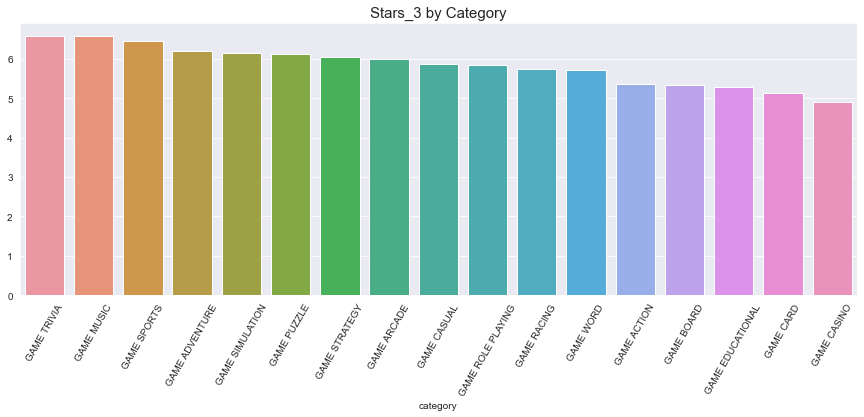

In [139]:
# with seaborn

plt.figure(figsize = (15,5))
sns.barplot(data = df_1, x = stars_3_by_category.index, y = stars_3_by_category.values)
plt.title('Stars_3 by Category', fontsize = 15)
plt.xticks(rotation = 60)

plt.show()

In [140]:
stars_4_by_category = df_1.groupby('category')['4_star_percent'].mean().sort_values(ascending = False)
stars_4_by_category

category
GAME WORD            14.406827
GAME TRIVIA          14.071500
GAME CARD            13.866270
GAME PUZZLE          13.441100
GAME SPORTS          12.497700
GAME STRATEGY        12.443200
GAME SIMULATION      12.386400
GAME ROLE PLAYING    12.165800
GAME CASUAL          11.804600
GAME ADVENTURE       11.759600
GAME BOARD           11.528200
GAME MUSIC           10.979900
GAME ARCADE          10.689800
GAME CASINO          10.504900
GAME RACING          10.113600
GAME ACTION          10.013900
GAME EDUCATIONAL      8.586000
Name: 4_star_percent, dtype: float64

In [141]:
fig = px.bar(stars_4_by_category, x = stars_4_by_category.index, y = stars_4_by_category.values,
            labels = {'y':'4_star_percent'}, title = 'Stars_4 by Category')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [142]:
stars_5_by_category = df_1.groupby('category')['4_star_percent'].mean().sort_values(ascending = False)
stars_5_by_category

category
GAME WORD            14.406827
GAME TRIVIA          14.071500
GAME CARD            13.866270
GAME PUZZLE          13.441100
GAME SPORTS          12.497700
GAME STRATEGY        12.443200
GAME SIMULATION      12.386400
GAME ROLE PLAYING    12.165800
GAME CASUAL          11.804600
GAME ADVENTURE       11.759600
GAME BOARD           11.528200
GAME MUSIC           10.979900
GAME ARCADE          10.689800
GAME CASINO          10.504900
GAME RACING          10.113600
GAME ACTION          10.013900
GAME EDUCATIONAL      8.586000
Name: 4_star_percent, dtype: float64

In [143]:
fig = px.bar(stars_5_by_category, x = stars_5_by_category.index, y = stars_5_by_category.values,
            labels = {'y':'5_star_percent'}, title = 'Stars_5 by Category')
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [144]:
stars = df_1.groupby('category')[['1_star_percent', '2_star_percent', '3_star_percent', '4_star_percent', '5_star_percent']].\
        mean()
stars

,1_star_percent,2_star_percent,3_star_percent,4_star_percent,5_star_percent
category,,,,,
GAME ACTION,11.259200,2.803500,5.362700,10.013900,70.561600
GAME ADVENTURE,10.096800,3.024500,6.190400,11.759600,68.928500
GAME ARCADE,9.798600,2.898500,6.004000,10.689800,70.608300
GAME BOARD,9.324100,2.478200,5.340600,11.528200,71.329400
GAME CARD,6.915317,2.008333,5.122302,13.866270,72.087063
GAME CASINO,7.157200,2.039900,4.892900,10.504900,75.405000
GAME CASUAL,8.469200,2.630500,5.870700,11.804600,71.224600
GAME EDUCATIONAL,11.316700,3.413800,5.276700,8.586000,71.406200
GAME MUSIC,11.448900,3.402300,6.569400,10.979900,67.599400


In [145]:
# with plotly

fig = px.line(stars, y = ['1_star_percent', '2_star_percent', '3_star_percent', '4_star_percent', '5_star_percent'],
             labels = {'category': 'Category', 'value': 'Stars'}, title = 'Star Percentage')
fig.show()

***- Above are the averages of the games according to their star rating.***

***- In general, the star rating averages of the game categories are close to each other***

***- It is seen that the 5-star rating averages of the games in the "Casino" category is higher than the others.*** 

### Multivariate Analysis

#### Top 5 Ranked Games by Category

- Rank
- Title
- Category
- Total Ratings
- Installation
- 5 Star Ratings
- 5 Star Percent
- Paid

In [146]:
top_5_ranked_games = df_1[df_1['rank'] < 6][['rank', 'title', 'category', 'total_ratings', 'installs_in_million',\
                                             '5_star_ratings', '5_star_percent', 'paid']]
top_5_ranked_games

,rank,title,category,total_ratings,installs_in_million,5_star_ratings,5_star_percent,paid
0,1,Garena Free Fire- World Series,GAME ACTION,86273129,500.0,63546766,73.66,False
1,2,PUBG MOBILE - Traverse,GAME ACTION,37276732,500.0,28339753,76.03,False
2,3,Mobile Legends: Bang Bang,GAME ACTION,26663595,100.0,18777988,70.43,False
3,4,Brawl Stars,GAME ACTION,17971552,100.0,13018610,72.44,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,GAME ACTION,14464235,500.0,9827328,67.94,False
...,...,...,...,...,...,...,...,...
1626,1,كلمات كراش - لعبة تسلية وتحدي من زيتونة,GAME WORD,2418119,10.0,2115189,87.47,False
1627,2,Word Cookies!®,GAME WORD,2250585,10.0,1679256,74.61,False
1628,3,Words of Wonders: Crossword to Connect Vocabulary,GAME WORD,1885400,100.0,1457939,77.33,False
1629,4,Words with Friends Classic: Word Puzzle Challenge,GAME WORD,1722914,50.0,971880,56.41,False


In [147]:
# with seaborn

# plt.figure(figsize = (15,15))
# sns.scatterplot(data = top_5_ranked_games, x = 'total_ratings', y = 'title', hue = 'category')
# plt.title('Star Percentage')
# plt.xticks(rotation = 45)

# plt.show()

In [148]:
fig = px.scatter(top_5_ranked_games, y = 'title', x = 'rank', 
                 hover_data = top_5_ranked_games[['category','rank', 'paid']], color = 'category', 
                 title = 'Top 5 Ranked Games by Category')
fig.show()

#### Top 5 Rated Games by Category

In [149]:
fig = px.scatter(top_5_ranked_games, y = 'title', x = 'total_ratings', 
                 hover_data = top_5_ranked_games[['category','rank', 'paid']], color = 'category', 
                 title = 'Top 5 Rated Games by Category')
fig.show()

***- We understand that the games in the "Action" and "Strategy" categories receive significantly higher ratings than the others from above chart.***

#### Top 5 Installed Games by Category

In [150]:
fig = px.scatter(top_5_ranked_games, y = 'title', x = 'installs_in_million', 
                 hover_data = top_5_ranked_games[['category','rank', 'paid']], color = 'category', 
                 title = 'Top 5 Installed Games by Category')
fig.show()

***- We understand that the games in the "Arcade" and "Casual" categories receive significantly higher value in terms of installations than the others from above chart.***

#### Top 5 Starred Games by Category

In [151]:
fig = px.scatter(top_5_ranked_games, y = 'title', x = '5_star_ratings', 
                 hover_data = top_5_ranked_games[['category','rank', 'paid']], color = 'category', 
                 title = 'Top 5 5_Starred Games by Category')
fig.show()

***- We understand that the games in the "Action and "Strategy" categories receive significantly higher value in terms of total star ratings than the others from above chart.***

#### Top 5 5_Starred Games by Category (Percentage)

In [152]:
fig = px.scatter(top_5_ranked_games, y = 'title', x = '5_star_percent', 
                 hover_data = top_5_ranked_games[['category','rank', 'paid']], color = 'category', 
                 title = 'Top 5 Starred Games by Category (Percentage)')
fig.show()

#### Most and Least Total Rated Games by Category

In [153]:
most_total_rated = df_1.loc[df_1.groupby('category')['total_ratings'].idxmax().values][['category','title',\
                          'total_ratings', 'rank', 'paid']]
most_total_rated

,category,title,total_ratings,rank,paid
0,GAME ACTION,Garena Free Fire- World Series,86273129,1,False
100,GAME ADVENTURE,Roblox,21820451,1,False
200,GAME ARCADE,Subway Surfers,35665901,1,False
300,GAME BOARD,Ludo King™,7512316,1,False
400,GAME CARD,Yu-Gi-Oh! Duel Links,2113853,1,False
526,GAME CASINO,Zynga Poker™ – Free Texas Holdem Online Card G...,2582669,1,False
626,GAME CASUAL,Candy Crush Saga,31367945,1,False
726,GAME EDUCATIONAL,Toca Life World: Build stories & create your w...,1690405,1,False
826,GAME MUSIC,Tiles Hop: EDM Rush!,2454558,1,False
926,GAME PUZZLE,Fishdom,4876844,1,False


In [154]:
fig = px.scatter(most_total_rated, y = 'title', x = 'total_ratings', 
                 hover_data = most_total_rated[['category', 'rank', 'paid']], color = 'category', 
                 title = 'Most Total Rated Games by Category')
fig.show()

In [155]:
least_total_rated = df_1.loc[df_1.groupby('category')['total_ratings'].idxmin().values][['category','title',\
                          'total_ratings', 'rank', 'paid']]
least_total_rated

,category,title,total_ratings,rank,paid
99,GAME ACTION,WWE Mayhem,703514,100,False
199,GAME ADVENTURE,Prison Escape Puzzle: Adventure,154835,100,False
299,GAME ARCADE,Paper.io,418663,100,False
399,GAME BOARD,Backgammon Offline,80887,100,False
525,GAME CARD,Age of Ishtaria - A.Battle RPG,88866,100,False
625,GAME CASINO,Slots! CashHit Slot Machines & Casino Games Party,83313,100,False
725,GAME CASUAL,Big Farm: Mobile Harvest – Free Farming Game,370755,100,False
825,GAME EDUCATIONAL,Kpopsies - Hatch Your Unicorn Idol,49811,100,False
925,GAME MUSIC,Berpacu Dalam Melody Indonesia,32993,100,False
1025,GAME PUZZLE,Who Is The Killer? Episode I,377015,100,False


In [156]:
fig = px.scatter(least_total_rated, y = 'title', x = 'total_ratings', 
                 hover_data = least_total_rated[['category', 'rank', 'paid']], color = 'category', 
                 title = 'Least Total Rated Games by Category')
fig.show()

#### Most and Least Total Installed Games by Category

In [157]:
most_installed = df_1.loc[df_1.groupby('category')['installs_in_million'].idxmax().values][['category','title',\
                          'installs_in_million', 'rank', 'paid']]
most_installed

,category,title,installs_in_million,rank,paid
0,GAME ACTION,Garena Free Fire- World Series,500.0,1,False
100,GAME ADVENTURE,Roblox,100.0,1,False
200,GAME ARCADE,Subway Surfers,1000.0,1,False
300,GAME BOARD,Ludo King™,500.0,1,False
402,GAME CARD,Solitaire,100.0,3,False
526,GAME CASINO,Zynga Poker™ – Free Texas Holdem Online Card G...,50.0,1,False
626,GAME CASUAL,Candy Crush Saga,1000.0,1,False
727,GAME EDUCATIONAL,Toca Kitchen 2,100.0,2,False
826,GAME MUSIC,Tiles Hop: EDM Rush!,100.0,1,False
926,GAME PUZZLE,Fishdom,100.0,1,False


In [158]:
fig = px.scatter(most_installed, y = 'title', x = 'installs_in_million', 
                 hover_data = most_installed[['category','rank', 'paid']], color = 'category', 
                 title = 'Most Installed Games by Category')
fig.show()

In [159]:
least_installed = df_1.loc[df_1.groupby('category')['installs_in_million'].idxmin().values][['category','title',\
                          'installs_in_million', 'rank', 'paid']]
least_installed

,category,title,installs_in_million,rank,paid
27,GAME ACTION,Call of Duty®: Mobile - Garena,10.0,28,False
142,GAME ADVENTURE,Survivors: The Quest,1.0,43,False
260,GAME ARCADE,Geometry Dash,1.0,61,True
341,GAME BOARD,Slots: Epic Jackpot Slots Games Free & Casino ...,1.0,42,False
477,GAME CARD,Reigns,0.5,60,True
612,GAME CASINO,Slots on Tour Casino - Vegas Slot Machine Game...,0.5,87,False
703,GAME CASUAL,Idle Sightseeing Train - Game of Train Transport,1.0,78,False
745,GAME EDUCATIONAL,超級單字王 - 英檢、多益、托福 輕鬆學,0.5,20,False
885,GAME MUSIC,Beat Bop: Pop Star Clicker,0.1,60,False
1024,GAME PUZZLE,디즈니 틀린그림찾기,1.0,99,False


In [160]:
fig = px.scatter(least_installed, y = 'title', x = 'installs_in_million', 
                 hover_data = least_installed[['category','rank', 'paid']], color = 'category', 
                 title = 'Least Installed Games by Category')
fig.show()

#### Most and Least 5 Starred Games by Category

In [161]:
most_5_starred = df_1.loc[df_1.groupby('category')['5_star_ratings'].idxmax().values][['category','title',\
                          '5_star_ratings', 'rank', 'paid']]
most_5_starred

,category,title,5_star_ratings,rank,paid
0,GAME ACTION,Garena Free Fire- World Series,63546766,1,False
100,GAME ADVENTURE,Roblox,16674013,1,False
200,GAME ARCADE,Subway Surfers,27138572,1,False
300,GAME BOARD,Ludo King™,5291589,1,False
400,GAME CARD,Yu-Gi-Oh! Duel Links,1541203,1,False
526,GAME CASINO,Zynga Poker™ – Free Texas Holdem Online Card G...,1821678,1,False
626,GAME CASUAL,Candy Crush Saga,23837448,1,False
726,GAME EDUCATIONAL,Toca Life World: Build stories & create your w...,1191130,1,False
826,GAME MUSIC,Tiles Hop: EDM Rush!,1815983,1,False
926,GAME PUZZLE,Fishdom,3641850,1,False


In [162]:
fig = px.scatter(most_5_starred, y = 'title', x = '5_star_ratings', 
                 hover_data = most_5_starred[['category','rank', 'paid']], color = 'category', 
                 title = 'Most 5 Starred Games by Category')
fig.show()

In [163]:
least_5_starred = df_1.loc[df_1.groupby('category')['5_star_ratings'].idxmin().values][['category','title',\
                          '5_star_ratings', 'rank', 'paid']]
least_5_starred

,category,title,5_star_ratings,rank,paid
95,GAME ACTION,Bullet Force,434187,96,False
192,GAME ADVENTURE,Draw Your Game,82072,93,False
299,GAME ARCADE,Paper.io,218936,100,False
399,GAME BOARD,Backgammon Offline,48946,100,False
525,GAME CARD,Age of Ishtaria - A.Battle RPG,49649,100,False
614,GAME CASINO,Spin Day - Win Real Money,47906,89,False
707,GAME CASUAL,Island Experiment,220970,82,False
824,GAME EDUCATIONAL,Vacation Hotel Stories,30222,99,False
918,GAME MUSIC,Piano Music Tiles 2 - Free Music Games,13975,93,False
1016,GAME PUZZLE,LINE PokoPoko - Play with POKOTA! Free puzzler!,158839,91,False


In [164]:
fig = px.scatter(least_5_starred, y = 'title', x = '5_star_ratings', 
                 hover_data = least_5_starred[['category','rank', 'paid']], color = 'category', 
                 title = 'Least 5 Starred Games by Category')
fig.show()

#### And now let's have a look at top-10 games according to the installation

In [165]:
top_10 = df_1.sort_values(by = 'installs_in_million', ascending = False)[:10]
top_10

,rank,title,total_ratings,installs_in_million,average_rating,growth_30_days,growth_60_days,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,5_star_percent,4_star_percent,3_star_percent,2_star_percent,1_star_percent,paid
200,1,Subway Surfers,35665901,1000.0,4,0.5,1.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142,76.09,9.44,4.55,2.28,7.64,False
626,1,Candy Crush Saga,31367945,1000.0,4,0.9,1.6,GAME CASUAL,23837448,4176798,1534041,486005,1333650,75.99,13.32,4.89,1.55,4.25,False
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,73.66,5.74,3.66,2.46,14.48,False
207,8,Temple Run,4816448,500.0,4,0.7,1.5,GAME ARCADE,3184391,438320,318164,204384,671187,66.11,9.10,6.61,4.24,13.94,False
1426,1,Clash of Clans,55766763,500.0,4,0.3,1.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141,77.73,9.69,4.08,1.74,6.76,False
1026,1,Hill Climb Racing,10188038,500.0,4,0.4,0.8,GAME RACING,7148370,982941,607603,338715,1110407,70.16,9.65,5.96,3.32,10.90,False
1326,1,8 Ball Pool,21632735,500.0,4,1.2,630.8,GAME SPORTS,16281475,2268294,1017204,425693,1640067,75.26,10.49,4.70,1.97,7.58,False
630,5,Pou,11506051,500.0,4,0.2,0.5,GAME CASUAL,8175679,1051014,688712,346244,1244400,71.06,9.13,5.99,3.01,10.82,False
628,3,My Talking Angela,13050503,500.0,4,0.6,1.4,GAME CASUAL,9165205,1073761,636763,399662,1775110,70.23,8.23,4.88,3.06,13.60,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,76.03,5.81,3.36,2.17,12.63,False


In [166]:
fig = px.bar(top_10, x = 'title', y = 'total_ratings', hover_data = top_10[['rank', '5_star_ratings', 'paid']],\
             color = 'category', title = 'Top 10 Most Rated Games')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

***- "Garena Free Fire World Series" and "Clash of Clans" games share the first 2 places among the top 10 games with total ratings over 50 M.***

In [167]:
fig = px.bar(top_10, x = 'title', y = 'installs_in_million', hover_data = top_10[['rank', '5_star_ratings', 'paid']],\
             color = 'category', title = 'Top 10 Most Installed Games')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

***- "Candy Crush Saga" and "Subway Surfers" share the top 2 places among the top 10 games with over 1000M downloads.***

We want to complete the EDA study here. If we briefly summarize what we have done so far;

- First of all, we tried to briefly touch on what EDA is,

- Ant then tried to understand our dataset to get an overview,

- After getting an overview and understand the variables, keep on getting basic information from dataframe,

- Although there is no missing value and duplicate value in the data set, I leave it here as a reminder because I believe cleaning the dataset is the most important stage of EDA work,

- According to the results of the basic information from the data set, we performed different operations and made some necessary adjusment on some columns, 

- And finaly ve visualized the variables to analyze relationships between variables.

- Do not forget to take notes at every stage of the EDA.

Below I list the sources that I have read and cited in this EDA study. There are many sources other than those I have listed. Reading will be very beneficial in terms of personal development.

- How to Clean Messy Pandas Column Names (https://towardsdatascience.com/how-to-clean-messy-pandas-column-names-20dc7400cea7)

- Mastering Exploratory Data Analysis(EDA) For Data Science Enthusiasts (https://www.analyticsvidhya.com/blog/2021/04/mastering-exploratory-data-analysiseda-for-data-science-enthusiasts/)

- Exploratory Data Analysis — Visualising, summarising, and interpreting data (https://medium.com/mlearning-ai/exploratory-data-analysis-visualising-summarising-and-interpreting-data-bbe2c9518afb)

- Exploratory Data Analysis (EDA) techniques for Kaggle competition beginners (https://towardsdatascience.com/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners-be4237c3c3a9)

IMPORTANT NOTE : 

I would like to point out that since the EDA study was carried out with a working group, it may have similarities with other kernels.

Thanks to Kaan Böke (https://www.kaggle.com/kaanboke), Süleyman Zeynul (https://www.kaggle.com/sleymanzeynul) ve Merve Ertaş Uslu (https://www.kaggle.com/merveertasuslu), Kadir Duran (https://www.kaggle.com/kadirduran)

We have come to the end of the study. This is my first EDA Project. I hope it is useful. I would be very happy if you send your constructive and educational comments about the kernel. 

Please don't forget to upvote if you liked!